# MODULE 1 : IMBALANCED LEARNING

---

### libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.naive_bayes import LabelBinarizer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, CondensedNearestNeighbour, EditedNearestNeighbours, ClusterCentroids
from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.tree._tree import TREE_LEAF

### 0) Data Visualization

seleziono la feature target: **groupedRating = {3, 4, 5, 6, 7, 8, 9}**

In [10]:
# =============================================================================
# PART 1.1: Data Loading, Preprocessing & Normalization (Normal Preprocessed Dataset)
# =============================================================================

# 1. Load the preprocessed train and test datasets from CSV
train_data_preprocessed = pd.read_csv("../../../0) dataset/1) preprocessed dataset/train_preprocessed.csv")
test_data_preprocessed  = pd.read_csv("../../../0) dataset/1) preprocessed dataset/test_preprocessed.csv")

# Drop the 'Unnamed: 0' column if it exists
train_data_preprocessed.drop(columns='Unnamed: 0', inplace=True, errors='ignore')
test_data_preprocessed.drop(columns='Unnamed: 0', inplace=True, errors='ignore')

# 2. Map the original "rating" into the new target "groupedRating"
def map_rating(r):
    # Map ratings 0, 1, 2, and 3 to 3; leave other ratings unchanged.
    if r in [0, 1, 2, 3]:
        return "<= 3"
    else:
        return "> 3"

train_data_preprocessed["groupedRating"] = train_data_preprocessed["rating"].apply(map_rating)
test_data_preprocessed["groupedRating"]  = test_data_preprocessed["rating"].apply(map_rating)

# Define the new target variable
target = "groupedRating"

# 3. Extract numerical columns dynamically from the training set
attributes = list(np.unique(train_data_preprocessed.select_dtypes(include=['int', 'float64']).columns))

# Remove dangerous features: remove the original "rating" and the target "groupedRating"
unwanted_values = {'rating', 'groupedRating', 'averageRating'}
attributes = [attr for attr in attributes if attr not in unwanted_values]
print("Initial numerical features:", attributes)

# 4. Define the feature matrix (X) and target vector (y) for both train and test sets
# Use new variable names to avoid conflict with outliers removed dataset
X_train_preprocessed = train_data_preprocessed[attributes].values
y_train_preprocessed = train_data_preprocessed[target].values

X_test_preprocessed  = test_data_preprocessed[attributes].values
y_test_preprocessed  = test_data_preprocessed[target].values

# 5. Normalize the features using StandardScaler
scaler_preprocessed = MinMaxScaler()
X_train_scaled_preprocessed = scaler_preprocessed.fit_transform(X_train_preprocessed)
X_test_scaled_preprocessed  = scaler_preprocessed.transform(X_test_preprocessed)

Initial numerical features: ['Action', 'Adventure', 'Animation', 'Asia', 'Australia/Oceania', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Europe', 'Middle East', 'North Africa', 'North America', 'Series', 'Short', 'South Africa', 'South America', 'awardNominationsExcludeWinsLog', 'awardWinsLog', 'castNumberLog', 'companiesNumberLog', 'criticReviewsTotalLog', 'directorsCreditsLog', 'externalLinksLog', 'isAdult', 'movie', 'numRegionsLog', 'numVotesLog', 'other', 'others', 'quotesTotalLog', 'runtimeMinutes', 'short', 'startYear', 'totalCreditsLog', 'totalImagesLog', 'totalVideosLog', 'userReviewsTotalLog', 'writerCreditsLog']


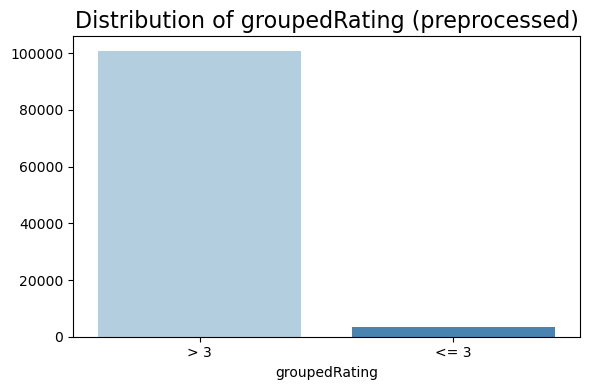

In [11]:
# Plot the target class distribution using training data from the preprocessed dataset
target_counts = train_data_preprocessed[target].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette='Blues', legend=False)
plt.title("Distribution of groupedRating (preprocessed)", fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
# =============================================================================
# PART 1.2: Data Loading, Preprocessing & Normalization (Outliers Removed Dataset)
# =============================================================================

# 1. Load the preprocessed and outliers removed train and test datasets from CSV
train_data_nooutliers = pd.read_csv("../../../0) dataset/2) preprocessed e no outliers dataset/train_preprocessed_nooutliers.csv")
test_data_nooutliers  = pd.read_csv("../../../0) dataset/2) preprocessed e no outliers dataset/test_preprocessed_nooutliers.csv")

# Drop the 'Unnamed: 0' column if it exists
train_data_nooutliers.drop(columns='Unnamed: 0', inplace=True, errors='ignore')
test_data_nooutliers.drop(columns='Unnamed: 0', inplace=True, errors='ignore')

# 2. Map the original "rating" into the new target "groupedRating"
def map_rating(r):
    # Map ratings 0, 1, 2, and 3 to 3; leave other ratings unchanged.
    if r in [0, 1, 2, 3]:
        return "<= 3"
    else:
        return "> 3"

train_data_nooutliers["groupedRating"] = train_data_nooutliers["rating"].apply(map_rating)
test_data_nooutliers["groupedRating"]  = test_data_nooutliers["rating"].apply(map_rating)

# Define the new target variable
target = "groupedRating"

# 3. Extract numerical columns dynamically from the training set
attributes = list(np.unique(train_data_nooutliers.select_dtypes(include=['int', 'float64']).columns))

# Remove dangerous features: remove the original "rating" and the target "groupedRating"
unwanted_values = {'rating', 'groupedRating', 'averageRating'}
attributes = [attr for attr in attributes if attr not in unwanted_values]
print("Initial numerical features:", attributes)

# 4. Define the feature matrix (X) and target vector (y) for both train and test sets
X_train_nooutliers = train_data_nooutliers[attributes].values
y_train_nooutliers = train_data_nooutliers[target].values

X_test_nooutliers  = test_data_nooutliers[attributes].values
y_test_nooutliers  = test_data_nooutliers[target].values

# 5. Normalize the features using StandardScaler
scaler_nooutliers = MinMaxScaler()
X_train_scaled_nooutliers = scaler_nooutliers.fit_transform(X_train_nooutliers)
X_test_scaled_nooutliers  = scaler_nooutliers.transform(X_test_nooutliers)

Initial numerical features: ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Series', 'Short', 'awardNominationsExcludeWinsLog', 'awardWinsLog', 'castNumberLog', 'companiesNumberLog', 'criticReviewsTotalLog', 'directorsCreditsLog', 'externalLinksLog', 'isAdult', 'movie', 'numRegionsLog', 'numVotesLog', 'other', 'others', 'quotesTotalLog', 'ratingCountLog', 'runtimeMinutes', 'short', 'startYear', 'totalCreditsLog', 'totalImagesLog', 'totalVideosLog', 'userReviewsTotalLog', 'writerCreditsLog']


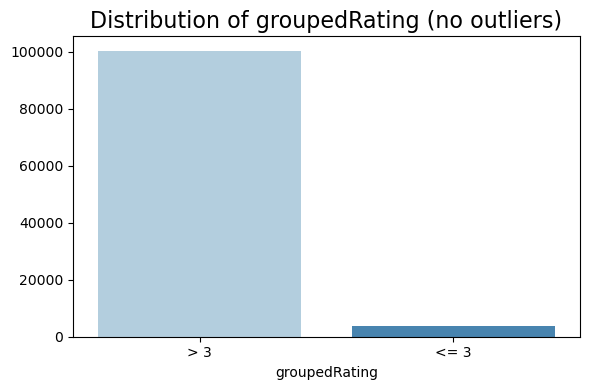

In [13]:
# Plot the target class distribution using training data from the preprocessed dataset
target_counts = train_data_nooutliers[target].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette='Blues', legend=False)
plt.title("Distribution of groupedRating (no outliers)", fontsize=16)
plt.tight_layout()
plt.show()

### 1) normal ML models execution

proviamo **DT** e **KNN** sul dataset normale per vedere le loro performance a monte

### 1.1) DT

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT: {'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated accuracy: 0.964521806050994

Decision Tree Classifier Report:
              precision    recall  f1-score   support

        <= 3       0.31      0.07      0.12      1585
         > 3       0.97      0.99      0.98     43275

    accuracy                           0.96     44860
   macro avg       0.64      0.53      0.55     44860
weighted avg       0.94      0.96      0.95     44860



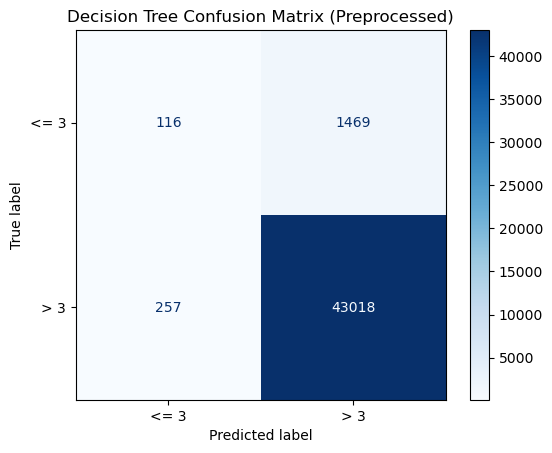

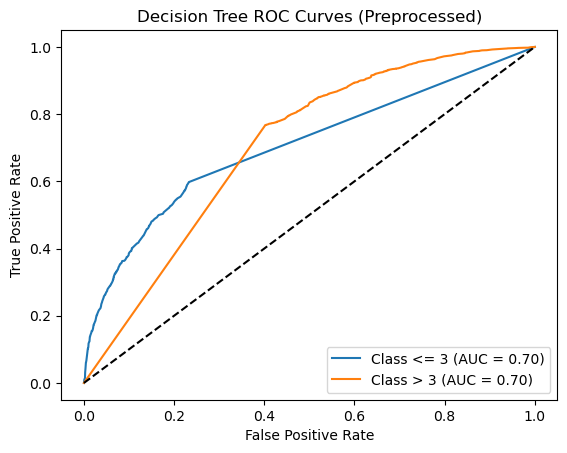

In [14]:
# =============================================================================
# PART 2: Decision Tree Classifier with Normalization & Robust Hyperparameter Tuning
# (For the new target: groupedRating, using the preprocessed dataset)
# =============================================================================

# --- Step C: Hyperparameter Tuning for Decision Tree using RandomizedSearchCV ---
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [10, 20],
    'criterion': ['entropy'],
}

random_search_dt_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,  # Increased iterations for a more robust search
    scoring='accuracy'  # Changed scoring to balanced_accuracy
)
random_search_dt_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)

print("\nBest hyperparameters for DT:", random_search_dt_preprocessed.best_params_)
print("Best cross-validated accuracy:", random_search_dt_preprocessed.best_score_)

# Set best_params_dt to those found by random search
best_params_dt_preprocessed = random_search_dt_preprocessed.best_params_

# --- Step D: Train and Evaluate the Final Decision Tree Model ---
best_dt_preprocessed = DecisionTreeClassifier(**best_params_dt_preprocessed, random_state=42)
best_dt_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)

# Evaluate the final model on the test set
y_pred_dt_preprocessed = best_dt_preprocessed.predict(X_test_scaled_preprocessed)
print("\nDecision Tree Classifier Report:")
print(classification_report(y_test_preprocessed, y_pred_dt_preprocessed))

# Plot and display the confusion matrix for the Decision Tree
cm_dt_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_dt_preprocessed)
disp_dt_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_dt_preprocessed, display_labels=best_dt_preprocessed.classes_)
disp_dt_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Preprocessed)")
plt.show()

# =============================================================================
# ROC Curve Evaluation (Preprocessed, Binary Classification)
# =============================================================================
preprocessed_classes = best_dt_preprocessed.classes_
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=preprocessed_classes)
if y_test_dt_bin_preprocessed.shape[1] == 1:
    y_test_dt_bin_preprocessed = np.hstack([1 - y_test_dt_bin_preprocessed, y_test_dt_bin_preprocessed])
y_score_dt_preprocessed = best_dt_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(preprocessed_classes):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_dt_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT (Nooutliers): {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.9578053148870664

Decision Tree Classifier Report (Nooutliers):
              precision    recall  f1-score   support

        <= 3       0.18      0.11      0.14      1579
         > 3       0.97      0.98      0.97     43084

    accuracy                           0.95     44663
   macro avg       0.58      0.55      0.56     44663
weighted avg       0.94      0.95      0.95     44663



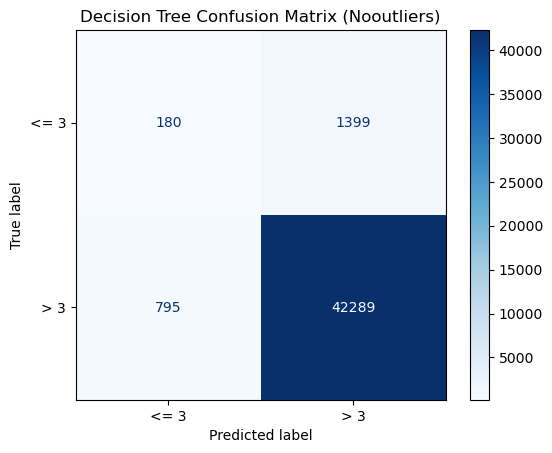

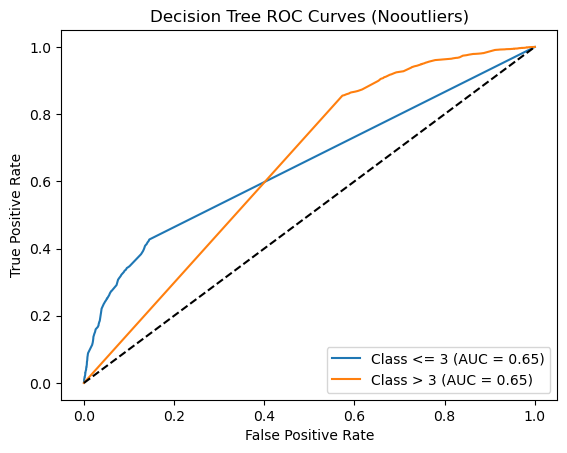

In [15]:
# =============================================================================
# PART 2: Decision Tree Classifier with Normalization & Robust Hyperparameter Tuning
# (For the new target: groupedRating, using the nooutliers dataset)
# =============================================================================

# --- Step C: Hyperparameter Tuning for Decision Tree using RandomizedSearchCV ---
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [10],
    'criterion': ['entropy']
}

random_search_dt_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_dt_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)

print("\nBest hyperparameters for DT (Nooutliers):", random_search_dt_nooutliers.best_params_)
print("Best cross-validated score for DT (Nooutliers):", random_search_dt_nooutliers.best_score_)

# Set best_params_dt to those found by random search
best_params_dt_nooutliers = random_search_dt_nooutliers.best_params_

# --- Step D: Train and Evaluate the Final Decision Tree Model ---
best_dt_nooutliers = DecisionTreeClassifier(**best_params_dt_nooutliers, random_state=42)
best_dt_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)

# Evaluate the final model on the test set
y_pred_dt_nooutliers = best_dt_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_dt_nooutliers))

# --- Step E: Plot Confusion Matrix ---
cm_dt_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_dt_nooutliers)
disp_dt_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_dt_nooutliers, display_labels=best_dt_nooutliers.classes_)
disp_dt_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Nooutliers)")
plt.show()

# --- Step F: ROC Curve Evaluation ---
nooutliers_classes = best_dt_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=nooutliers_classes)
if y_test_dt_bin_nooutliers.shape[1] == 1:
    y_test_dt_bin_nooutliers = np.hstack([1 - y_test_dt_bin_nooutliers, y_test_dt_bin_nooutliers])
y_score_dt_nooutliers = best_dt_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(nooutliers_classes):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_dt_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

---

### 2) imbalanced learning ML models execution

### 2.1) UnderSampling

### 2.2.1) Random UnderSampling

Class distribution after RUS (Preprocessed):
<= 3    3596
> 3     3596
Name: count, dtype: int64


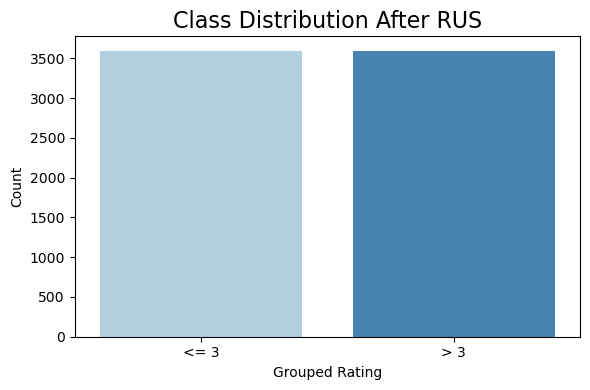

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT (Preprocessed): {'min_samples_split': 2, 'min_samples_leaf': 50, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Preprocessed): 0.7009869123686381

Decision Tree Classifier Report (After RUS - Preprocessed):
              precision    recall  f1-score   support

        <= 3       0.07      0.70      0.13      1585
         > 3       0.98      0.68      0.81     43275

    accuracy                           0.68     44860
   macro avg       0.53      0.69      0.47     44860
weighted avg       0.95      0.68      0.78     44860



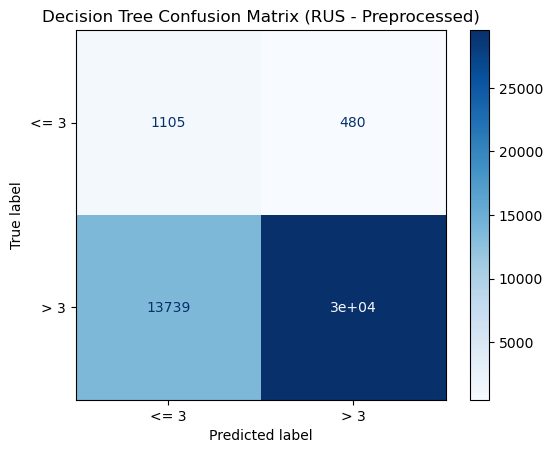

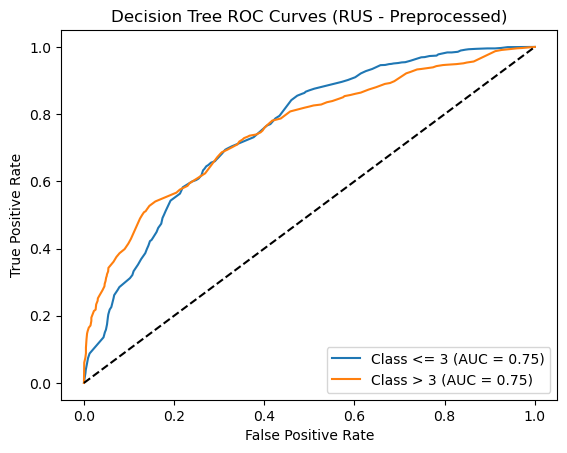

In [16]:
# =============================================================================
# Handling Class Imbalance with Random Undersampling (RUS) for Preprocessed Dataset
# =============================================================================
rus = RandomUnderSampler(random_state=42)
X_res_rus_preprocessed, y_res_rus_preprocessed = rus.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# ----- Plot Undersampled Target Distribution -----
print("Class distribution after RUS (Preprocessed):")
print(pd.Series(y_res_rus_preprocessed).value_counts())
target_counts_after = pd.Series(y_res_rus_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_after.index, y=target_counts_after.values, hue=target_counts_after.index, palette='Blues', legend=False)
plt.title("Class Distribution After RUS", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Hyperparameter Tuning using RandomizedSearchCV on RUS Data (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [10, 50, 100],
    'criterion': ['entropy']
}

random_search_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_dt.fit(X_res_rus_preprocessed, y_res_rus_preprocessed)
best_params_dt = random_search_dt.best_params_
print("\nBest hyperparameters for DT (Preprocessed):", best_params_dt)
print("Best cross-validated score for DT (Preprocessed):", random_search_dt.best_score_)

# =============================================================================
# Train & Evaluate Decision Tree Classifier After RUS with Best Parameters (Preprocessed)
# =============================================================================
best_dt_rus_preprocessed = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_rus_preprocessed.fit(X_res_rus_preprocessed, y_res_rus_preprocessed)

# Predict on the test set
y_pred_dt_rus_preprocessed = best_dt_rus_preprocessed.predict(X_test_scaled_preprocessed)
print("\nDecision Tree Classifier Report (After RUS - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_dt_rus_preprocessed))

# Plot Confusion Matrix
cm_rus_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_dt_rus_preprocessed)
disp_rus_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_rus_preprocessed, display_labels=best_dt_rus_preprocessed.classes_)
disp_rus_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (RUS - Preprocessed)")
plt.show()

# =============================================================================
# ROC Curve Evaluation for the RUS Model (Preprocessed, Binary Classification)
# =============================================================================
classes_rus = best_dt_rus_preprocessed.classes_
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=classes_rus)

# If we have only one column (binary case), transform it to two columns
if y_test_dt_bin_preprocessed.shape[1] == 1:
    y_test_dt_bin_preprocessed = np.hstack([1 - y_test_dt_bin_preprocessed, y_test_dt_bin_preprocessed])
y_score_dt_preprocessed = best_dt_rus_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_rus):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_dt_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (RUS - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Class distribution after RUS (Nooutliers):
<= 3    3589
> 3     3589
Name: count, dtype: int64


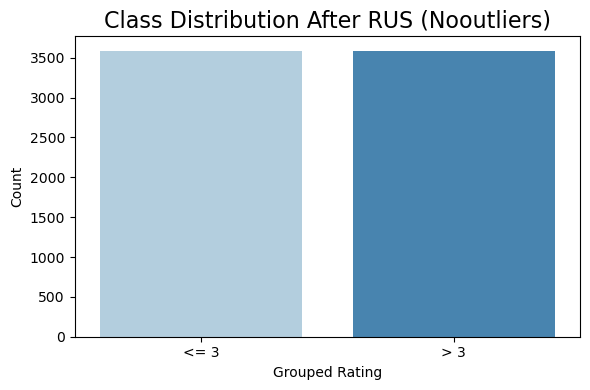

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT (Nooutliers): {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.6941357623285743

Decision Tree Classifier Report (After RUS - Nooutliers):
              precision    recall  f1-score   support

        <= 3       0.07      0.72      0.13      1579
         > 3       0.98      0.67      0.80     43084

    accuracy                           0.67     44663
   macro avg       0.53      0.69      0.46     44663
weighted avg       0.95      0.67      0.77     44663



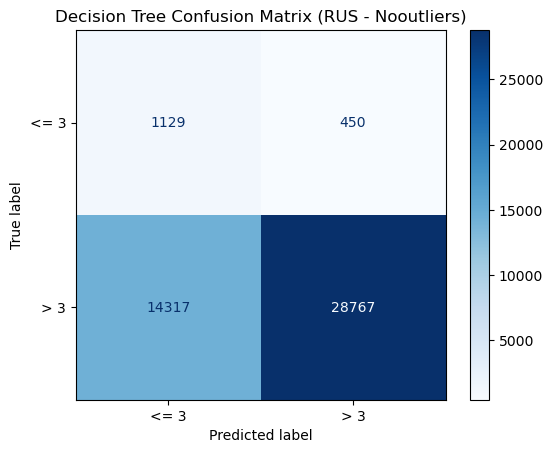

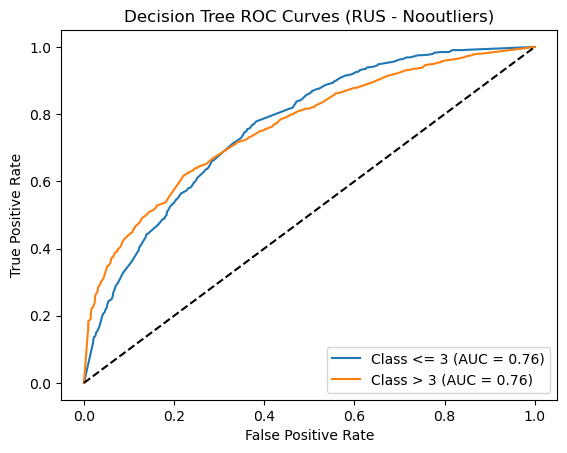

In [17]:
# =============================================================================
# Handling Class Imbalance with Random Undersampling (RUS) for Nooutliers Dataset
# =============================================================================
rus_nooutliers = RandomUnderSampler(random_state=42)
X_res_rus_nooutliers, y_res_rus_nooutliers = rus_nooutliers.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# ----- Plot Undersampled Target Distribution -----
print("Class distribution after RUS (Nooutliers):")
print(pd.Series(y_res_rus_nooutliers).value_counts())
target_counts_after_nooutliers = pd.Series(y_res_rus_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_after_nooutliers.index, y=target_counts_after_nooutliers.values, hue=target_counts_after_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After RUS (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Hyperparameter Tuning using RandomizedSearchCV on RUS Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [10, 20],
    'criterion': ['entropy']
}

random_search_dt_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_dt_nooutliers.fit(X_res_rus_nooutliers, y_res_rus_nooutliers)
best_params_dt_nooutliers = random_search_dt_nooutliers.best_params_
print("\nBest hyperparameters for DT (Nooutliers):", best_params_dt_nooutliers)
print("Best cross-validated score for DT (Nooutliers):", random_search_dt_nooutliers.best_score_)

# =============================================================================
# Train & Evaluate Decision Tree Classifier After RUS with Best Parameters (Nooutliers)
# =============================================================================
best_dt_rus_nooutliers = DecisionTreeClassifier(**best_params_dt_nooutliers, random_state=42)
best_dt_rus_nooutliers.fit(X_res_rus_nooutliers, y_res_rus_nooutliers)

# Predict on the test set
y_pred_dt_rus_nooutliers = best_dt_rus_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After RUS - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_dt_rus_nooutliers))

# Plot Confusion Matrix
cm_rus_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_dt_rus_nooutliers)
disp_rus_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_rus_nooutliers, display_labels=best_dt_rus_nooutliers.classes_)
disp_rus_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (RUS - Nooutliers)")
plt.show()

# =============================================================================
# ROC Curve Evaluation for the RUS Model (Nooutliers, Binary Classification)
# =============================================================================
classes_rus_nooutliers = best_dt_rus_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_rus_nooutliers)
if y_test_dt_bin_nooutliers.shape[1] == 1:
    y_test_dt_bin_nooutliers = np.hstack([1 - y_test_dt_bin_nooutliers, y_test_dt_bin_nooutliers])
y_score_dt_nooutliers = best_dt_rus_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_rus_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_dt_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (RUS - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2.2) Tomek Links

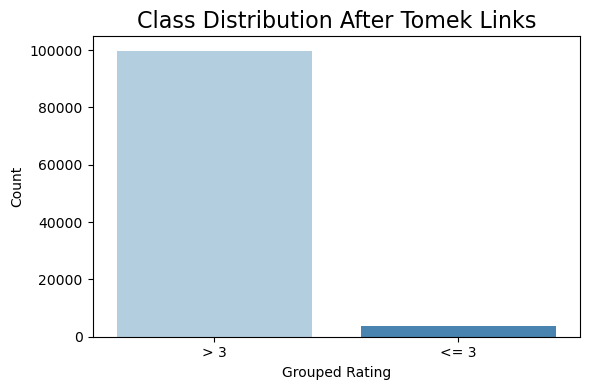

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after Tomek Links (Preprocessed): {'min_samples_split': 10, 'min_samples_leaf': 30, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Preprocessed): 0.964577548504932

Decision Tree Classifier Report (After Tomek Links - Preprocessed):
              precision    recall  f1-score   support

        <= 3       0.32      0.06      0.10      1585
         > 3       0.97      1.00      0.98     43275

    accuracy                           0.96     44860
   macro avg       0.64      0.53      0.54     44860
weighted avg       0.94      0.96      0.95     44860



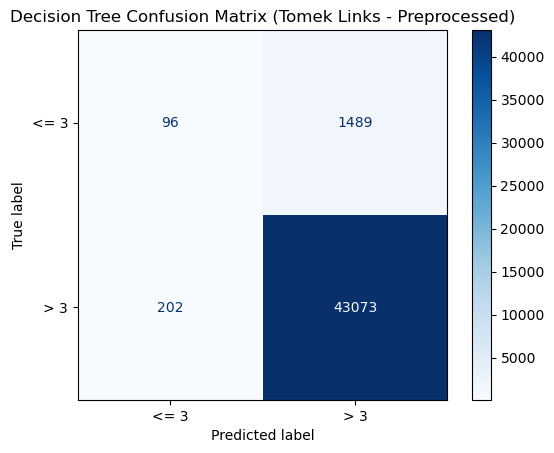

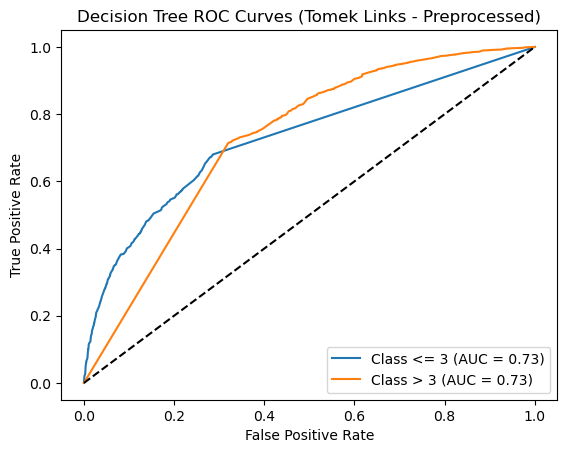

In [18]:
# =============================================================================
# Step 1: Apply Tomek Links Undersampling (Preprocessed Dataset)
# =============================================================================
tl = TomekLinks()
X_res_tl_preprocessed, y_res_tl_preprocessed = tl.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 2: Plot Class Distribution After Tomek Links
# =============================================================================
target_counts_tl = pd.Series(y_res_tl_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_tl.index, y=target_counts_tl.values, hue=target_counts_tl.index,
            palette='Blues', legend=False)
plt.title("Class Distribution After Tomek Links", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning using RandomizedSearchCV on Tomek Links Data
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 30],
    'criterion': ['entropy']
}

random_search_tl_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_tl_preprocessed.fit(X_res_tl_preprocessed, y_res_tl_preprocessed)
best_params_dt = random_search_tl_preprocessed.best_params_
print("\nBest hyperparameters for DT after Tomek Links (Preprocessed):", best_params_dt)
print("Best cross-validated score for DT (Preprocessed):", random_search_tl_preprocessed.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using New Best Parameters
# =============================================================================
best_dt_tl_preprocessed = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_tl_preprocessed.fit(X_res_tl_preprocessed, y_res_tl_preprocessed)

# Predict on the test set
y_pred_tl_preprocessed = best_dt_tl_preprocessed.predict(X_test_scaled_preprocessed)
print("\nDecision Tree Classifier Report (After Tomek Links - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_tl_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix
# =============================================================================
cm_tl_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_tl_preprocessed)
disp_tl_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_tl_preprocessed, display_labels=best_dt_tl_preprocessed.classes_)
disp_tl_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Tomek Links - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the Model
# =============================================================================
classes_tl = best_dt_tl_preprocessed.classes_
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=classes_tl)
if y_test_dt_bin_preprocessed.shape[1] == 1:
    y_test_dt_bin_preprocessed = np.hstack([1 - y_test_dt_bin_preprocessed, y_test_dt_bin_preprocessed])
y_score_tl_preprocessed = best_dt_tl_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_tl):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_tl_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Tomek Links - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

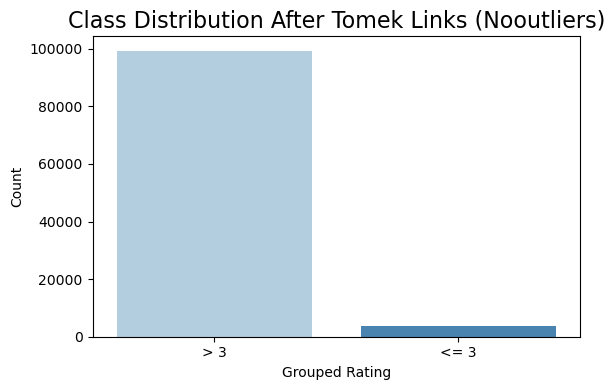

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after Tomek Links (Nooutliers): {'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.9640656884656496

Decision Tree Classifier Report (After TL - Nooutliers):
              precision    recall  f1-score   support

        <= 3       0.27      0.07      0.11      1579
         > 3       0.97      0.99      0.98     43084

    accuracy                           0.96     44663
   macro avg       0.62      0.53      0.55     44663
weighted avg       0.94      0.96      0.95     44663



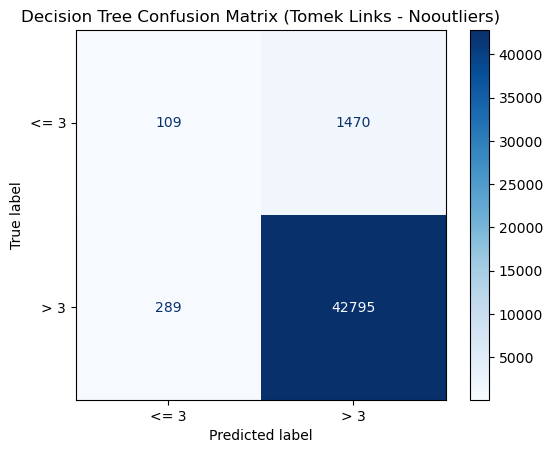

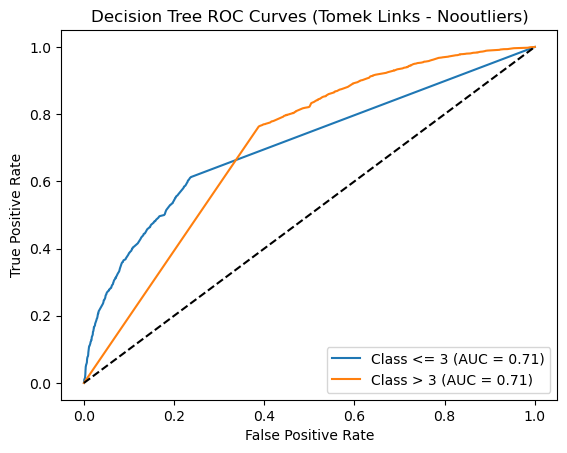

In [19]:
# =============================================================================
# Step 1: Apply Tomek Links Undersampling (Nooutliers Dataset)
# =============================================================================
tl = TomekLinks()
X_res_tl_nooutliers, y_res_tl_nooutliers = tl.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# =============================================================================
# Step 2: Plot Class Distribution After Tomek Links (Nooutliers)
# =============================================================================
target_counts_tl_nooutliers = pd.Series(y_res_tl_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_tl_nooutliers.index, y=target_counts_tl_nooutliers.values, hue=target_counts_tl_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After Tomek Links (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning using RandomizedSearchCV on TL Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 20],
    'criterion': ['entropy']
}

random_search_tl_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_tl_nooutliers.fit(X_res_tl_nooutliers, y_res_tl_nooutliers)
best_params_dt_nooutliers = random_search_tl_nooutliers.best_params_
print("\nBest hyperparameters for DT after Tomek Links (Nooutliers):", best_params_dt_nooutliers)
print("Best cross-validated score for DT (Nooutliers):", random_search_tl_nooutliers.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier After TL with Best Parameters (Nooutliers)
# =============================================================================
best_dt_tl_nooutliers = DecisionTreeClassifier(**best_params_dt_nooutliers, random_state=42)
best_dt_tl_nooutliers.fit(X_res_tl_nooutliers, y_res_tl_nooutliers)

# Predict on the test set
y_pred_tl_nooutliers = best_dt_tl_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After TL - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_tl_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_tl_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_tl_nooutliers)
disp_tl_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_tl_nooutliers, display_labels=best_dt_tl_nooutliers.classes_)
disp_tl_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Tomek Links - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the TL Model (Nooutliers)
# =============================================================================
classes_tl_nooutliers = best_dt_tl_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_tl_nooutliers)
if y_test_dt_bin_nooutliers.shape[1] == 1:
    y_test_dt_bin_nooutliers = np.hstack([1 - y_test_dt_bin_nooutliers, y_test_dt_bin_nooutliers])
y_score_tl_nooutliers = best_dt_tl_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_tl_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_tl_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Tomek Links - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2.3) Edited Nearest Neighbors

Class distribution after ENN (Preprocessed):
> 3     93167
<= 3     3596
Name: count, dtype: int64


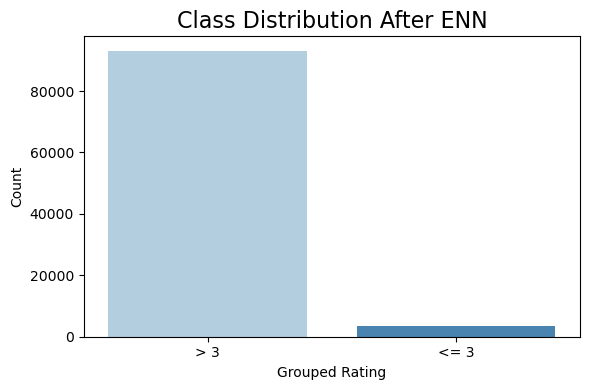

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after ENN (Preprocessed): {'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT after ENN (Preprocessed): 0.9630850740555779

Decision Tree Classifier Report (After ENN - Preprocessed):
              precision    recall  f1-score   support

        <= 3       0.28      0.11      0.16      1585
         > 3       0.97      0.99      0.98     43275

    accuracy                           0.96     44860
   macro avg       0.62      0.55      0.57     44860
weighted avg       0.94      0.96      0.95     44860



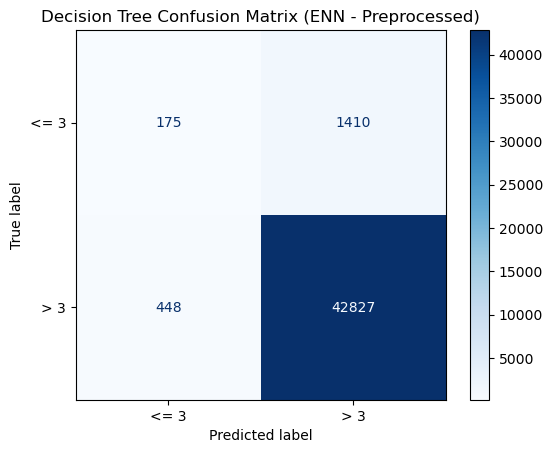

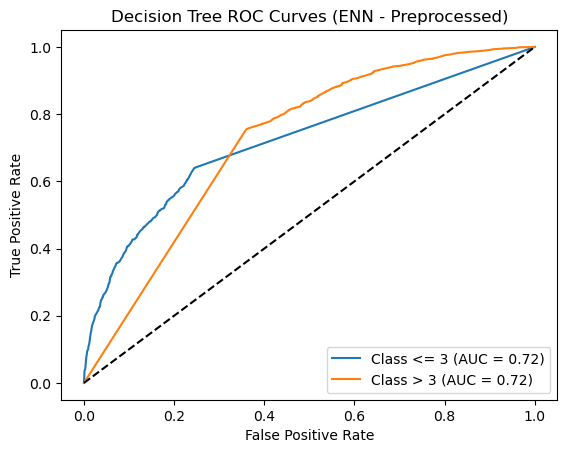

In [20]:
# =============================================================================
# Step 1: Apply Edited Nearest Neighbors (ENN) Undersampling (Preprocessed Dataset)
# =============================================================================
enn = EditedNearestNeighbours()
X_res_enn_preprocessed, y_res_enn_preprocessed = enn.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 2: Plot Class Distribution After ENN
# =============================================================================
print("Class distribution after ENN (Preprocessed):")
print(pd.Series(y_res_enn_preprocessed).value_counts())
target_counts_enn = pd.Series(y_res_enn_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_enn.index, y=target_counts_enn.values, hue=target_counts_enn.index, palette='Blues', legend=False)
plt.title("Class Distribution After ENN", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on ENN Data (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_enn_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_enn_preprocessed.fit(X_res_enn_preprocessed, y_res_enn_preprocessed)
best_params_enn = random_search_enn_preprocessed.best_params_
print("\nBest hyperparameters for DT after ENN (Preprocessed):", best_params_enn)
print("Best cross-validated score for DT after ENN (Preprocessed):", random_search_enn_preprocessed.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ENN Data (Preprocessed)
# =============================================================================
best_dt_enn_preprocessed = DecisionTreeClassifier(**best_params_enn, random_state=42)
best_dt_enn_preprocessed.fit(X_res_enn_preprocessed, y_res_enn_preprocessed)

# Predict on the test set
y_pred_enn_preprocessed = best_dt_enn_preprocessed.predict(X_test_scaled_preprocessed)
print("\nDecision Tree Classifier Report (After ENN - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_enn_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_enn_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_enn_preprocessed)
disp_enn_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_enn_preprocessed, display_labels=best_dt_enn_preprocessed.classes_)
disp_enn_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (ENN - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the ENN Model (Preprocessed)
# =============================================================================
classes_enn = best_dt_enn_preprocessed.classes_
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=classes_enn)
if y_test_dt_bin_preprocessed.shape[1] == 1:
    y_test_dt_bin_preprocessed = np.hstack([1 - y_test_dt_bin_preprocessed, y_test_dt_bin_preprocessed])
y_score_enn_preprocessed = best_dt_enn_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_enn):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_enn_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (ENN - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Class distribution after ENN (Nooutliers):
> 3     92577
<= 3     3589
Name: count, dtype: int64


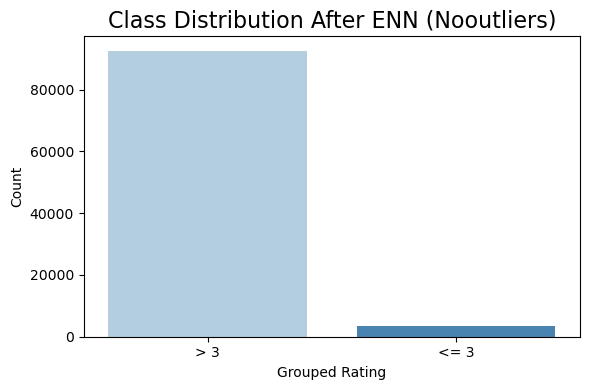

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after ENN (Nooutliers): {'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.9619876033446358

Decision Tree Classifier Report (After ENN - Nooutliers):
              precision    recall  f1-score   support

        <= 3       0.24      0.11      0.15      1579
         > 3       0.97      0.99      0.98     43084

    accuracy                           0.96     44663
   macro avg       0.60      0.55      0.56     44663
weighted avg       0.94      0.96      0.95     44663



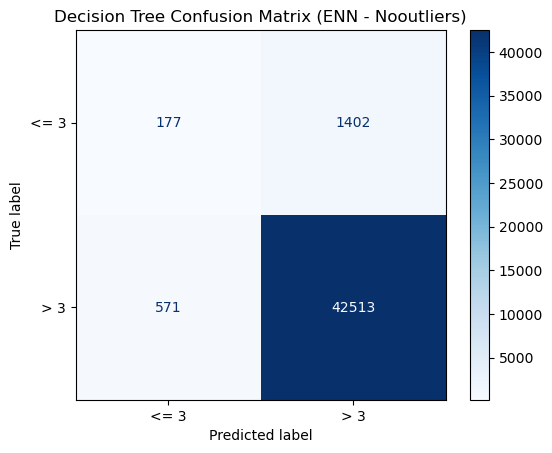

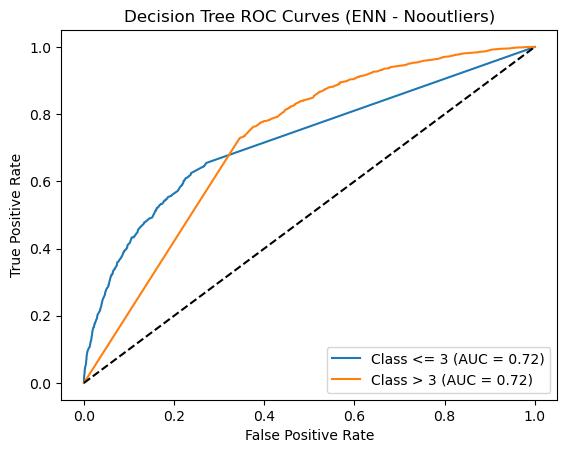

In [21]:
# =============================================================================
# Step 1: Apply Edited Nearest Neighbors (ENN) Undersampling (Nooutliers Dataset)
# =============================================================================
enn_nooutliers = EditedNearestNeighbours()
X_res_enn_nooutliers, y_res_enn_nooutliers = enn_nooutliers.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# =============================================================================
# Step 2: Plot Class Distribution After ENN (Nooutliers)
# =============================================================================
print("Class distribution after ENN (Nooutliers):")
print(pd.Series(y_res_enn_nooutliers).value_counts())
target_counts_enn_nooutliers = pd.Series(y_res_enn_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_enn_nooutliers.index, y=target_counts_enn_nooutliers.values, hue=target_counts_enn_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After ENN (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning using RandomizedSearchCV on ENN Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_enn_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_enn_nooutliers.fit(X_res_enn_nooutliers, y_res_enn_nooutliers)
best_params_dt_nooutliers = random_search_enn_nooutliers.best_params_
print("\nBest hyperparameters for DT after ENN (Nooutliers):", best_params_dt_nooutliers)
print("Best cross-validated score for DT (Nooutliers):", random_search_enn_nooutliers.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ENN Data (Nooutliers)
# =============================================================================
best_dt_enn_nooutliers = DecisionTreeClassifier(**best_params_dt_nooutliers, random_state=42)
best_dt_enn_nooutliers.fit(X_res_enn_nooutliers, y_res_enn_nooutliers)

# Predict on the test set
y_pred_enn_nooutliers = best_dt_enn_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After ENN - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_enn_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_enn_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_enn_nooutliers)
disp_enn_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_enn_nooutliers, display_labels=best_dt_enn_nooutliers.classes_)
disp_enn_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (ENN - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the ENN Model (Nooutliers)
# =============================================================================
classes_enn_nooutliers = best_dt_enn_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_enn_nooutliers)
if y_test_dt_bin_nooutliers.shape[1] == 1:
    y_test_dt_bin_nooutliers = np.hstack([1 - y_test_dt_bin_nooutliers, y_test_dt_bin_nooutliers])
y_score_enn_nooutliers = best_dt_enn_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_enn_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_enn_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (ENN - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2.4) Condensed Nearest Neighbors

In [22]:
"""
# =============================================================================
# Step 1: Apply Condensed Nearest Neighbours (CNN) Undersampling
# =============================================================================
cnn = CondensedNearestNeighbour(random_state=42)
X_res_cnn, y_res_cnn = cnn.fit_resample(X_train_dt_scaled, y_train_dt)

# =============================================================================
# Step 2: Plot Class Distribution After CNN
# =============================================================================
target_counts_cnn = pd.Series(y_res_cnn).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_cnn.index, y=target_counts_cnn.values, hue=target_counts_cnn.index, palette='Blues', legend=False)
plt.title("Class Distribution After Condensed Nearest Neighbours", fontsize=16)
plt.xlabel("Grouped Title Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV
# =============================================================================
"""
"""
param_grid_dt = {
    'max_depth': [None] + list(range(2, 20)),
    'min_samples_split': [10, 20, 50, 100],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}

random_search_cnn = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_cnn.fit(X_res_cnn, y_res_cnn)
best_params_cnn = random_search_cnn.best_params_
print("\nBest hyperparameters for DT after Condensed Nearest Neighbours:", best_params_cnn)
"""
"""

best_params_cnn = {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 14, 'criterion': 'entropy'}

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using CNN Data
# =============================================================================
best_dt_cnn = DecisionTreeClassifier(**best_params_cnn, random_state=42)
best_dt_cnn.fit(X_res_cnn, y_res_cnn)
y_pred_dt_cnn = best_dt_cnn.predict(X_test_dt_scaled)

print("\nDecision Tree Classifier Report (After CNN):")
print(classification_report(y_test_dt, y_pred_dt_cnn))

# =============================================================================
# Step 5: Plot Confusion Matrix
# =============================================================================
cm_cnn = confusion_matrix(y_test_dt, y_pred_dt_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=best_dt_cnn.classes_)
disp_cnn.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (CNN)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves for the CNN Model
# =============================================================================
# Binarize the true labels for multiclass ROC computation
classes_cnn = best_dt_cnn.classes_
y_test_bin_cnn = label_binarize(y_test_dt, classes=classes_cnn)
y_score_cnn = best_dt_cnn.predict_proba(X_test_dt_scaled)

plt.figure()
for i, cls in enumerate(classes_cnn):
    fpr, tpr, _ = roc_curve(y_test_bin_cnn[:, i], y_score_cnn[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (CNN)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
"""

'\n\nbest_params_cnn = {\'min_samples_split\': 10, \'min_samples_leaf\': 5, \'max_depth\': 14, \'criterion\': \'entropy\'}\n\n# =============================================================================\n# Step 4: Train & Evaluate Decision Tree Classifier Using CNN Data\n# =============================================================================\nbest_dt_cnn = DecisionTreeClassifier(**best_params_cnn, random_state=42)\nbest_dt_cnn.fit(X_res_cnn, y_res_cnn)\ny_pred_dt_cnn = best_dt_cnn.predict(X_test_dt_scaled)\n\nprint("\nDecision Tree Classifier Report (After CNN):")\nprint(classification_report(y_test_dt, y_pred_dt_cnn))\n\n# =============================================================================\n# Step 5: Plot Confusion Matrix\n# =============================================================================\ncm_cnn = confusion_matrix(y_test_dt, y_pred_dt_cnn)\ndisp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=best_dt_cnn.classes_)\ndisp_cnn.plot(

### 2.2.5) Cluster Centroids

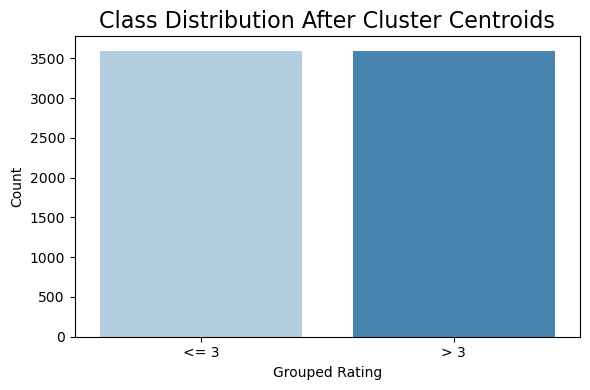

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after Cluster Centroids (Preprocessed): {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.9705229640039394

Decision Tree Classifier Report (After Cluster Centroids - Preprocessed):
              precision    recall  f1-score   support

        <= 3       0.04      0.99      0.08      1585
         > 3       1.00      0.14      0.25     43275

    accuracy                           0.17     44860
   macro avg       0.52      0.56      0.16     44860
weighted avg       0.96      0.17      0.24     44860



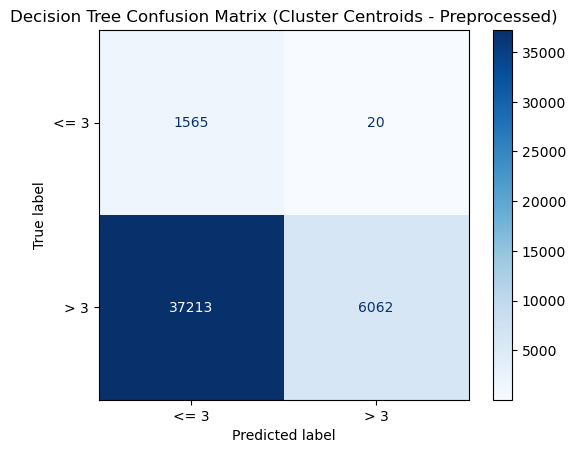

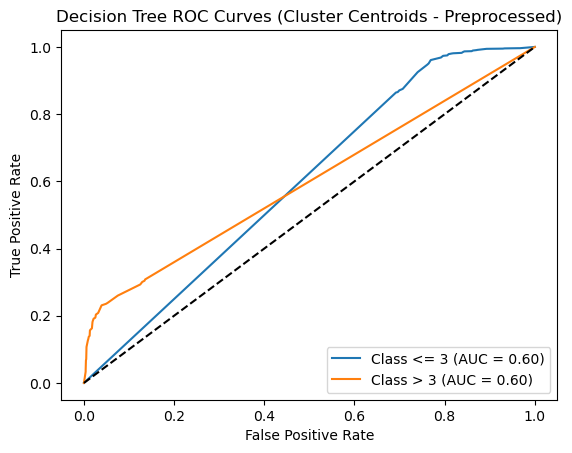

In [23]:
# =============================================================================
# Step 1: Apply Cluster Centroids Undersampling using MiniBatchKMeans (Preprocessed Dataset)
# =============================================================================
cc_preprocessed = ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=42), random_state=42)
X_res_cc_preprocessed, y_res_cc_preprocessed = cc_preprocessed.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 2: Plot Class Distribution After Cluster Centroids (Preprocessed)
# =============================================================================
target_counts_cc = pd.Series(y_res_cc_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_cc.index, y=target_counts_cc.values, hue=target_counts_cc.index, palette='Blues', legend=False)
plt.title("Class Distribution After Cluster Centroids", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [5, 10, 50],
    'min_samples_leaf': [10, 20, 50],
    'criterion': ['entropy']
}

random_search_cc_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_cc_preprocessed.fit(X_res_cc_preprocessed, y_res_cc_preprocessed)
best_params_cc_preprocessed = random_search_cc_preprocessed.best_params_
print("\nBest hyperparameters for DT after Cluster Centroids (Preprocessed):", best_params_cc_preprocessed)
print("Best cross-validated score for DT (Nooutliers):", random_search_cc_preprocessed.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using Cluster Centroids Data (Preprocessed)
# =============================================================================
best_dt_cc_preprocessed = DecisionTreeClassifier(**best_params_cc_preprocessed, random_state=42)
best_dt_cc_preprocessed.fit(X_res_cc_preprocessed, y_res_cc_preprocessed)
y_pred_dt_cc_preprocessed = best_dt_cc_preprocessed.predict(X_test_scaled_preprocessed)

print("\nDecision Tree Classifier Report (After Cluster Centroids - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_dt_cc_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_cc_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_dt_cc_preprocessed)
disp_cc_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_cc_preprocessed, display_labels=best_dt_cc_preprocessed.classes_)
disp_cc_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Cluster Centroids - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the Cluster Centroids Model (Preprocessed)
# =============================================================================
classes_cc = best_dt_cc_preprocessed.classes_
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=classes_cc)
if y_test_dt_bin_preprocessed.shape[1] == 1:
    y_test_dt_bin_preprocessed = np.hstack([1 - y_test_dt_bin_preprocessed, y_test_dt_bin_preprocessed])
y_score_cc_preprocessed = best_dt_cc_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_cc):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_cc_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Cluster Centroids - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

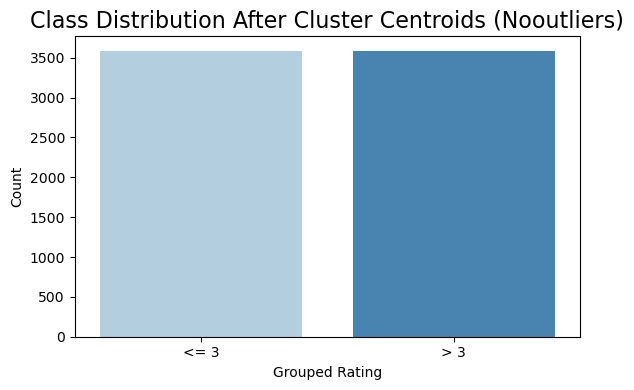

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after Cluster Centroids (Nooutliers): {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.9667033377655703

Decision Tree Classifier Report (After Cluster Centroids - Nooutliers):
              precision    recall  f1-score   support

        <= 3       0.04      0.98      0.08      1579
         > 3       1.00      0.15      0.26     43084

    accuracy                           0.18     44663
   macro avg       0.52      0.57      0.17     44663
weighted avg       0.96      0.18      0.26     44663



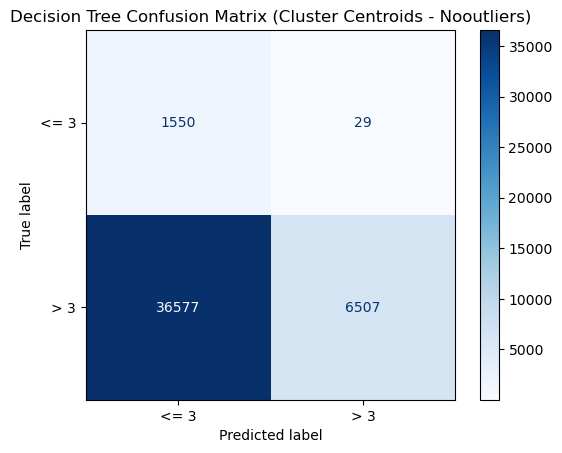

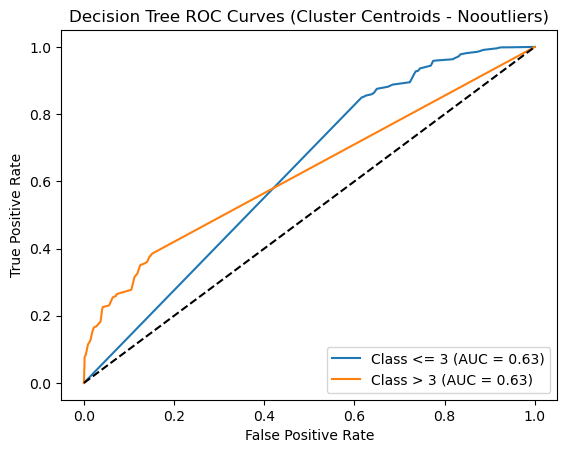

In [24]:
# =============================================================================
# Step 1: Apply Cluster Centroids Undersampling using MiniBatchKMeans (Nooutliers Dataset)
# =============================================================================
cc_nooutliers = ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=42), random_state=42)
X_res_cc_nooutliers, y_res_cc_nooutliers = cc_nooutliers.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# =============================================================================
# Step 2: Plot Class Distribution After Cluster Centroids (Nooutliers)
# =============================================================================
target_counts_cc_nooutliers = pd.Series(y_res_cc_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_cc_nooutliers.index, y=target_counts_cc_nooutliers.values, hue=target_counts_cc_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After Cluster Centroids (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on Cluster Centroids Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_cc_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_cc_nooutliers.fit(X_res_cc_nooutliers, y_res_cc_nooutliers)
best_params_cc_nooutliers = random_search_cc_nooutliers.best_params_
print("\nBest hyperparameters for DT after Cluster Centroids (Nooutliers):", best_params_cc_nooutliers)
print("Best cross-validated score for DT (Nooutliers):", random_search_cc_nooutliers.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using Cluster Centroids Data (Nooutliers)
# =============================================================================
best_dt_cc_nooutliers = DecisionTreeClassifier(**best_params_cc_nooutliers, random_state=42)
best_dt_cc_nooutliers.fit(X_res_cc_nooutliers, y_res_cc_nooutliers)
y_pred_dt_cc_nooutliers = best_dt_cc_nooutliers.predict(X_test_scaled_nooutliers)

print("\nDecision Tree Classifier Report (After Cluster Centroids - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_dt_cc_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_cc_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_dt_cc_nooutliers)
disp_cc_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_cc_nooutliers, display_labels=best_dt_cc_nooutliers.classes_)
disp_cc_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Cluster Centroids - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the Cluster Centroids Model (Nooutliers)
# =============================================================================
classes_cc_nooutliers = best_dt_cc_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_cc_nooutliers)
if y_test_dt_bin_nooutliers.shape[1] == 1:
    y_test_dt_bin_nooutliers = np.hstack([1 - y_test_dt_bin_nooutliers, y_test_dt_bin_nooutliers])
y_score_cc_nooutliers = best_dt_cc_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_cc_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_cc_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Cluster Centroids - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2) OverSampling

### 2.2.1) Random Oversampling

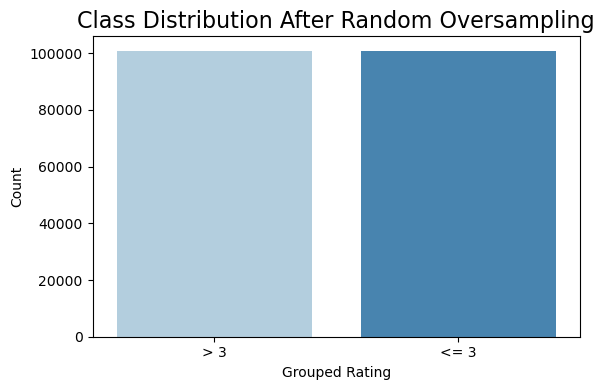

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after Random Oversampling (Preprocessed): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.9731405960810401

Decision Tree Classifier Report (After Random Oversampling - Preprocessed):
              precision    recall  f1-score   support

        <= 3       0.15      0.22      0.18      1585
         > 3       0.97      0.96      0.96     43275

    accuracy                           0.93     44860
   macro avg       0.56      0.59      0.57     44860
weighted avg       0.94      0.93      0.94     44860



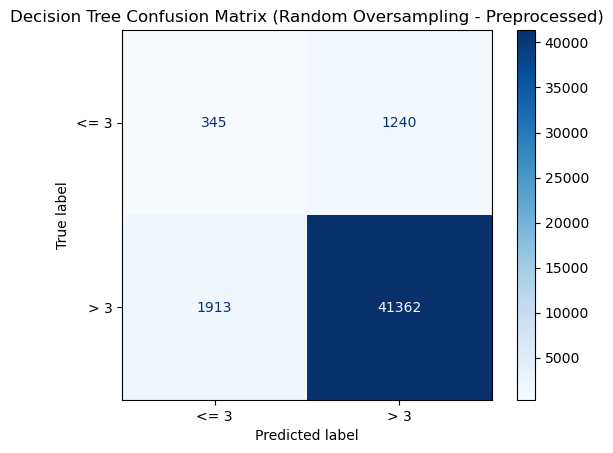

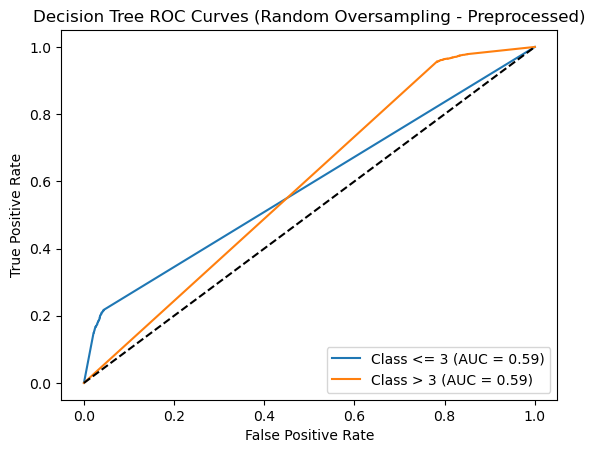

In [25]:
# =============================================================================
# Step 1: Apply Random Oversampling (ROS) for Preprocessed Dataset
# =============================================================================
ros = RandomOverSampler(random_state=42)
X_res_ros_preprocessed, y_res_ros_preprocessed = ros.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 2: Plot Class Distribution After Random Oversampling (Preprocessed)
# =============================================================================
target_counts_ros_preprocessed = pd.Series(y_res_ros_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_ros_preprocessed.index, y=target_counts_ros_preprocessed.values, hue=target_counts_ros_preprocessed.index, palette='Blues', legend=False)
plt.title("Class Distribution After Random Oversampling", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on ROS Data (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_ros_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_ros_preprocessed.fit(X_res_ros_preprocessed, y_res_ros_preprocessed)
best_params_ros_preprocessed = random_search_ros_preprocessed.best_params_
print("\nBest hyperparameters for DT after Random Oversampling (Preprocessed):", best_params_ros_preprocessed)
print("Best cross-validated score for DT (Nooutliers):", random_search_ros_preprocessed.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ROS Data (Preprocessed)
# =============================================================================
best_dt_ros_preprocessed = DecisionTreeClassifier(**best_params_ros_preprocessed, random_state=42)
best_dt_ros_preprocessed.fit(X_res_ros_preprocessed, y_res_ros_preprocessed)

# Predict on the test set
y_pred_ros_preprocessed = best_dt_ros_preprocessed.predict(X_test_scaled_preprocessed)
print("\nDecision Tree Classifier Report (After Random Oversampling - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_ros_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_ros_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_ros_preprocessed)
disp_ros_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_ros_preprocessed, display_labels=best_dt_ros_preprocessed.classes_)
disp_ros_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Random Oversampling - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the ROS Model (Preprocessed)
# =============================================================================
classes_ros_preprocessed = best_dt_ros_preprocessed.classes_
y_test_bin_ros_preprocessed = label_binarize(y_test_preprocessed, classes=classes_ros_preprocessed)
if y_test_bin_ros_preprocessed.shape[1] == 1:
    y_test_bin_ros_preprocessed = np.hstack([1 - y_test_bin_ros_preprocessed, y_test_bin_ros_preprocessed])
y_score_ros_preprocessed = best_dt_ros_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_ros_preprocessed):
    fpr, tpr, _ = roc_curve(y_test_bin_ros_preprocessed[:, i], y_score_ros_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Random Oversampling - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

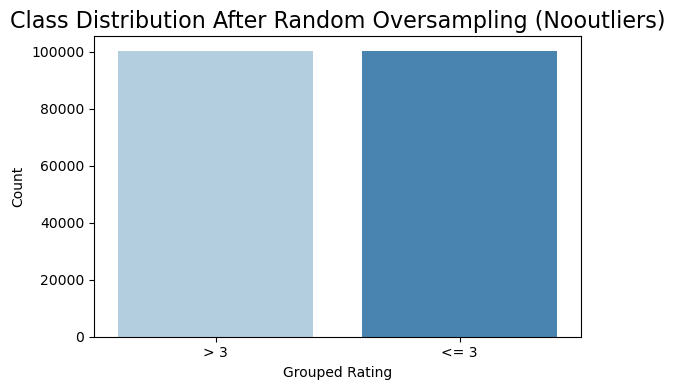

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after Random Oversampling (Nooutliers): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score: 0.9724449059593365

Decision Tree Classifier Report (After Random Oversampling - Nooutliers):
              precision    recall  f1-score   support

        <= 3       0.15      0.22      0.17      1579
         > 3       0.97      0.95      0.96     43084

    accuracy                           0.93     44663
   macro avg       0.56      0.59      0.57     44663
weighted avg       0.94      0.93      0.93     44663



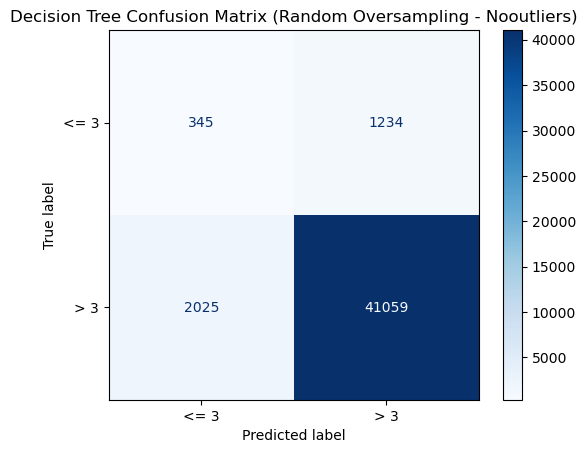

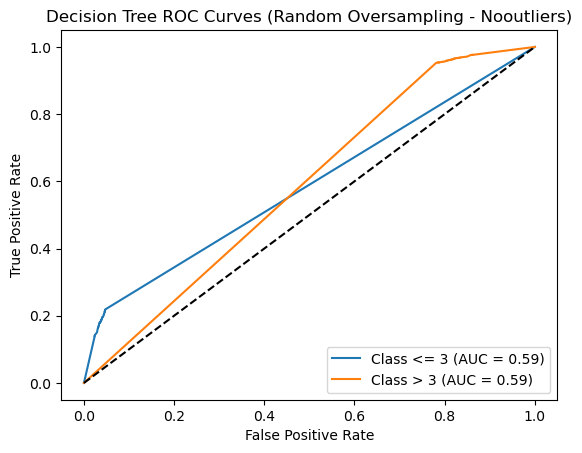

In [26]:
# =============================================================================
# Step 1: Apply Random Oversampling (ROS) for Nooutliers Dataset
# =============================================================================
ros_nooutliers = RandomOverSampler(random_state=42)
X_res_ros_nooutliers, y_res_ros_nooutliers = ros_nooutliers.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# =============================================================================
# Step 2: Plot Class Distribution After Random Oversampling (Nooutliers)
# =============================================================================
target_counts_ros_nooutliers = pd.Series(y_res_ros_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_ros_nooutliers.index, y=target_counts_ros_nooutliers.values, hue=target_counts_ros_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After Random Oversampling (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on ROS Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_ros_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_ros_nooutliers.fit(X_res_ros_nooutliers, y_res_ros_nooutliers)
best_params_ros_nooutliers = random_search_ros_nooutliers.best_params_
print("\nBest hyperparameters for DT after Random Oversampling (Nooutliers):", best_params_ros_nooutliers)
print("Best cross-validated score:", random_search_ros_nooutliers.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ROS Data (Nooutliers)
# =============================================================================
best_dt_ros_nooutliers = DecisionTreeClassifier(**best_params_ros_nooutliers, random_state=42)
best_dt_ros_nooutliers.fit(X_res_ros_nooutliers, y_res_ros_nooutliers)

# Predict on the test set
y_pred_ros_nooutliers = best_dt_ros_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After Random Oversampling - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_ros_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_ros_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_ros_nooutliers)
disp_ros_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_ros_nooutliers, display_labels=best_dt_ros_nooutliers.classes_)
disp_ros_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Random Oversampling - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the ROS Model (Nooutliers)
# =============================================================================
classes_ros_nooutliers = best_dt_ros_nooutliers.classes_
y_test_dt_bin_ros_nooutliers = label_binarize(y_test_nooutliers, classes=classes_ros_nooutliers)
if y_test_dt_bin_ros_nooutliers.shape[1] == 1:
    y_test_dt_bin_ros_nooutliers = np.hstack([1 - y_test_dt_bin_ros_nooutliers, y_test_dt_bin_ros_nooutliers])
y_score_ros_nooutliers = best_dt_ros_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_ros_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_ros_nooutliers[:, i], y_score_ros_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Random Oversampling - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2.2) SMOTE

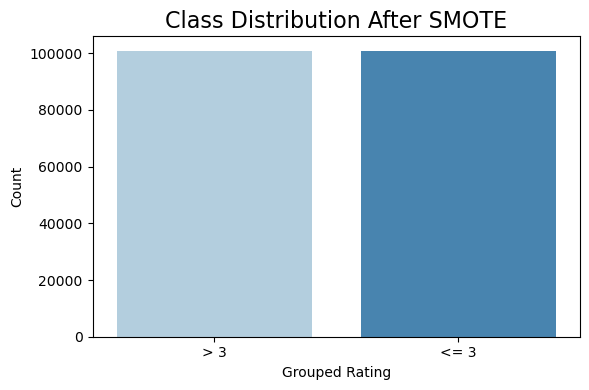

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after SMOTE (Preprocessed): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score: 0.9528821282068075

Decision Tree Classifier Report (After SMOTE - Preprocessed):
              precision    recall  f1-score   support

        <= 3       0.12      0.17      0.14      1585
         > 3       0.97      0.95      0.96     43275

    accuracy                           0.93     44860
   macro avg       0.54      0.56      0.55     44860
weighted avg       0.94      0.93      0.93     44860



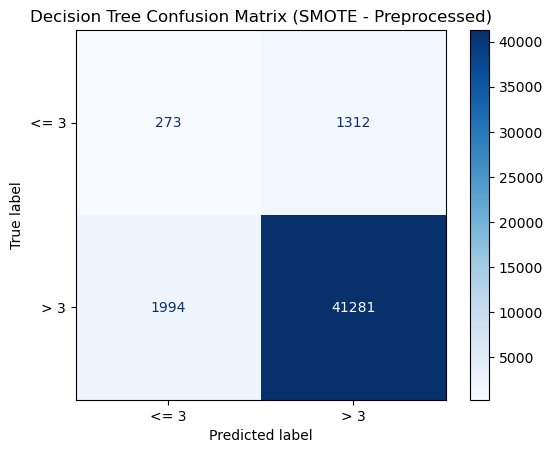

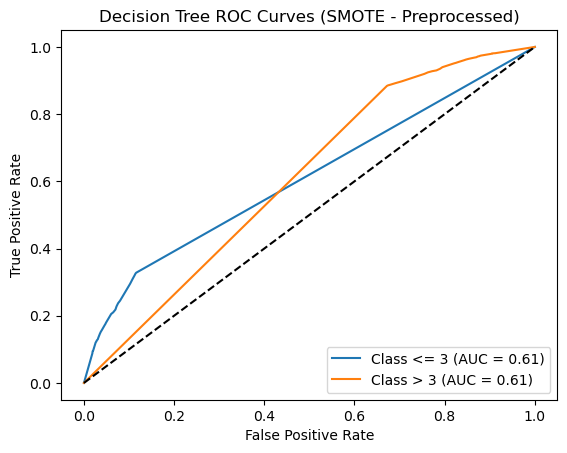

In [27]:
# =============================================================================
# Step 1: Apply SMOTE Oversampling (Preprocessed Dataset)
# =============================================================================
smote = SMOTE(random_state=42)
X_res_smote_preprocessed, y_res_smote_preprocessed = smote.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 2: Plot Class Distribution After SMOTE (Preprocessed)
# =============================================================================
target_counts_smote = pd.Series(y_res_smote_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_smote.index, y=target_counts_smote.values, hue=target_counts_smote.index, palette='Blues', legend=False)
plt.title("Class Distribution After SMOTE", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on SMOTE Data (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_smote_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_smote_preprocessed.fit(X_res_smote_preprocessed, y_res_smote_preprocessed)
best_params_smote = random_search_smote_preprocessed.best_params_
print("\nBest hyperparameters for DT after SMOTE (Preprocessed):", best_params_smote)
print("Best cross-validated score:", random_search_smote_preprocessed.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using SMOTE Data (Preprocessed)
# =============================================================================
best_dt_smote_preprocessed = DecisionTreeClassifier(**best_params_smote, random_state=42)
best_dt_smote_preprocessed.fit(X_res_smote_preprocessed, y_res_smote_preprocessed)
y_pred_smote_preprocessed = best_dt_smote_preprocessed.predict(X_test_scaled_preprocessed)

print("\nDecision Tree Classifier Report (After SMOTE - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_smote_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_smote = confusion_matrix(y_test_preprocessed, y_pred_smote_preprocessed)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=best_dt_smote_preprocessed.classes_)
disp_smote.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (SMOTE - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves for the SMOTE Model (Preprocessed)
# =============================================================================
classes_smote = best_dt_smote_preprocessed.classes_
y_test_bin_smote = label_binarize(y_test_preprocessed, classes=classes_smote)
if y_test_bin_smote.shape[1] == 1:
    y_test_bin_smote = np.hstack([1 - y_test_bin_smote, y_test_bin_smote])
y_score_smote = best_dt_smote_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_smote):
    fpr, tpr, _ = roc_curve(y_test_bin_smote[:, i], y_score_smote[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (SMOTE - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

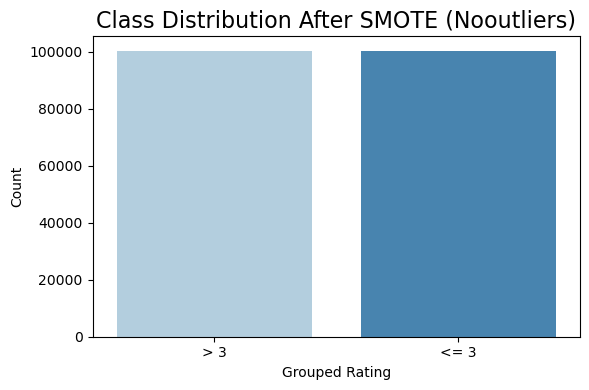

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after SMOTE (Nooutliers): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score: 0.9557619757187099

Decision Tree Classifier Report (After SMOTE - Nooutliers):
              precision    recall  f1-score   support

        <= 3       0.13      0.20      0.16      1579
         > 3       0.97      0.95      0.96     43084

    accuracy                           0.92     44663
   macro avg       0.55      0.58      0.56     44663
weighted avg       0.94      0.92      0.93     44663



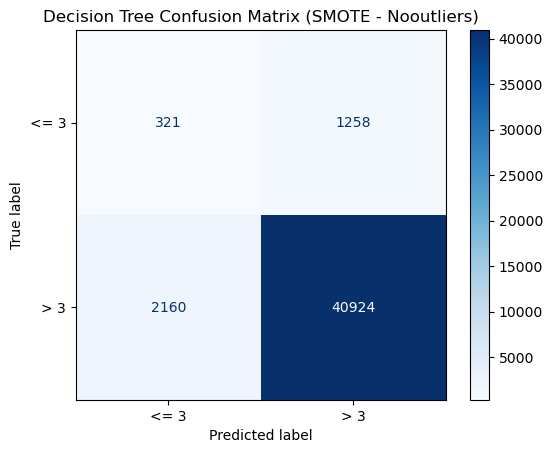

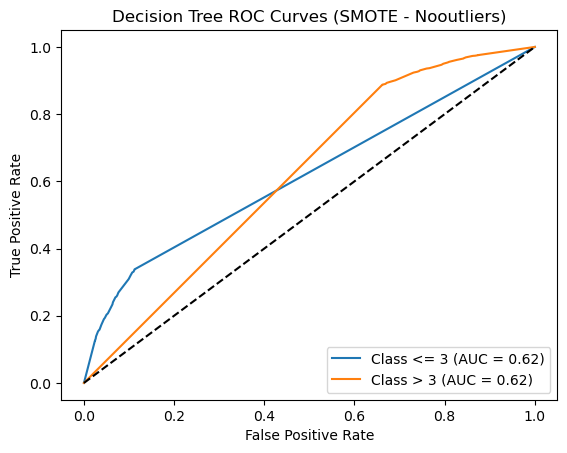

In [28]:
# =============================================================================
# Step 1: Apply SMOTE Oversampling (Nooutliers Dataset)
# =============================================================================
smote = SMOTE(random_state=42)
X_res_smote_nooutliers, y_res_smote_nooutliers = smote.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# =============================================================================
# Step 2: Plot Class Distribution After SMOTE (Nooutliers)
# =============================================================================
target_counts_smote_nooutliers = pd.Series(y_res_smote_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_smote_nooutliers.index, y=target_counts_smote_nooutliers.values, hue=target_counts_smote_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After SMOTE (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on SMOTE Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'criterion': ['entropy']
}

random_search_smote_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_smote_nooutliers.fit(X_res_smote_nooutliers, y_res_smote_nooutliers)
best_params_smote_nooutliers = random_search_smote_nooutliers.best_params_
print("\nBest hyperparameters for DT after SMOTE (Nooutliers):", best_params_smote_nooutliers)
print("Best cross-validated score:", random_search_smote_nooutliers.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using SMOTE Data (Nooutliers)
# =============================================================================
best_dt_smote_nooutliers = DecisionTreeClassifier(**best_params_smote_nooutliers, random_state=42)
best_dt_smote_nooutliers.fit(X_res_smote_nooutliers, y_res_smote_nooutliers)

# Predict on the test set
y_pred_smote_nooutliers = best_dt_smote_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After SMOTE - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_smote_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_smote_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_smote_nooutliers)
disp_smote_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_smote_nooutliers, display_labels=best_dt_smote_nooutliers.classes_)
disp_smote_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (SMOTE - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the SMOTE Model (Nooutliers)
# =============================================================================
classes_smote_nooutliers = best_dt_smote_nooutliers.classes_
y_test_dt_bin_smote_nooutliers = label_binarize(y_test_nooutliers, classes=classes_smote_nooutliers)
if y_test_dt_bin_smote_nooutliers.shape[1] == 1:
    y_test_dt_bin_smote_nooutliers = np.hstack([1 - y_test_dt_bin_smote_nooutliers, y_test_dt_bin_smote_nooutliers])
y_score_smote_nooutliers = best_dt_smote_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_smote_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_smote_nooutliers[:, i], y_score_smote_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (SMOTE - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2.3) ADASYN

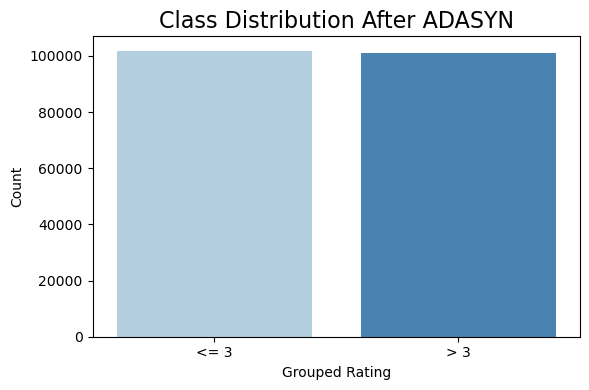

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after ADASYN (Preprocessed): {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score: 0.9607561235092638

Decision Tree Classifier Report (After ADASYN - Preprocessed):
              precision    recall  f1-score   support

        <= 3       0.14      0.19      0.16      1585
         > 3       0.97      0.96      0.96     43275

    accuracy                           0.93     44860
   macro avg       0.55      0.57      0.56     44860
weighted avg       0.94      0.93      0.93     44860



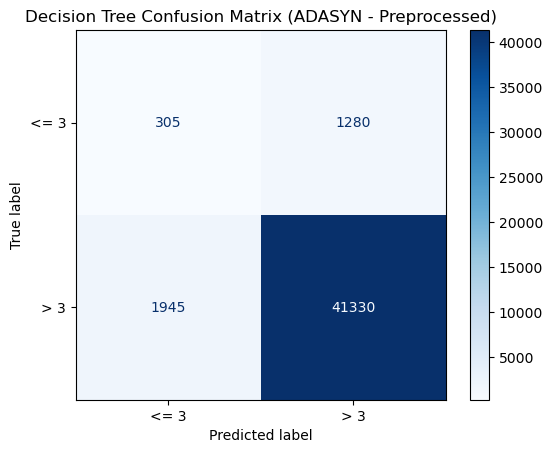

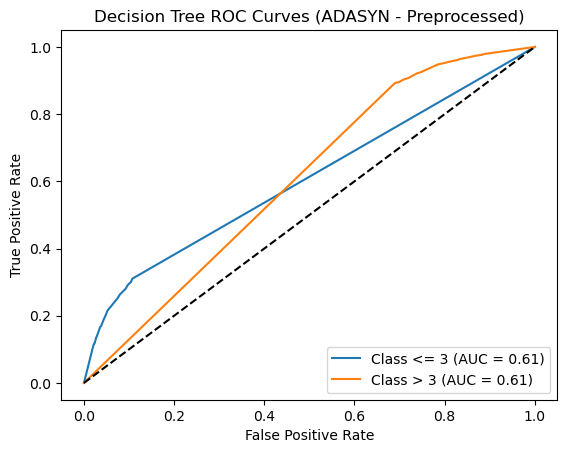

In [29]:
# =============================================================================
# Step 1: Apply ADASYN Oversampling (Preprocessed Dataset)
# =============================================================================
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
try:
    X_res_adasyn_preprocessed, y_res_adasyn_preprocessed = adasyn.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)
except ValueError as e:
    print("ADASYN error:", e)
    X_res_adasyn_preprocessed, y_res_adasyn_preprocessed = X_train_scaled_preprocessed, y_train_preprocessed

# =============================================================================
# Step 2: Plot Class Distribution After ADASYN (Preprocessed)
# =============================================================================
target_counts_adasyn_preprocessed = pd.Series(y_res_adasyn_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_adasyn_preprocessed.index, y=target_counts_adasyn_preprocessed.values, hue=target_counts_adasyn_preprocessed.index, palette='Blues', legend=False)
plt.title("Class Distribution After ADASYN", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on ADASYN Data (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 50],
    'min_samples_leaf': [3],
    'criterion': ['entropy']
}

random_search_adasyn_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_adasyn_preprocessed.fit(X_res_adasyn_preprocessed, y_res_adasyn_preprocessed)
best_params_adasyn = random_search_adasyn_preprocessed.best_params_
print("\nBest hyperparameters for DT after ADASYN (Preprocessed):", best_params_adasyn)
print("Best cross-validated score:", random_search_adasyn_preprocessed.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ADASYN Data (Preprocessed)
# =============================================================================
best_dt_adasyn_preprocessed = DecisionTreeClassifier(**best_params_adasyn, random_state=42)
best_dt_adasyn_preprocessed.fit(X_res_adasyn_preprocessed, y_res_adasyn_preprocessed)
y_pred_adasyn_preprocessed = best_dt_adasyn_preprocessed.predict(X_test_scaled_preprocessed)

print("\nDecision Tree Classifier Report (After ADASYN - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_adasyn_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_adasyn_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_adasyn_preprocessed)
disp_adasyn_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_adasyn_preprocessed, display_labels=best_dt_adasyn_preprocessed.classes_)
disp_adasyn_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (ADASYN - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves for the ADASYN Model (Preprocessed)
# =============================================================================
classes_adasyn = best_dt_adasyn_preprocessed.classes_
y_test_dt_bin_adasyn = label_binarize(y_test_preprocessed, classes=classes_adasyn)
if y_test_dt_bin_adasyn.shape[1] == 1:
    y_test_dt_bin_adasyn = np.hstack([1 - y_test_dt_bin_adasyn, y_test_dt_bin_adasyn])
y_score_adasyn = best_dt_adasyn_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_adasyn):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_adasyn[:, i], y_score_adasyn[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (ADASYN - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

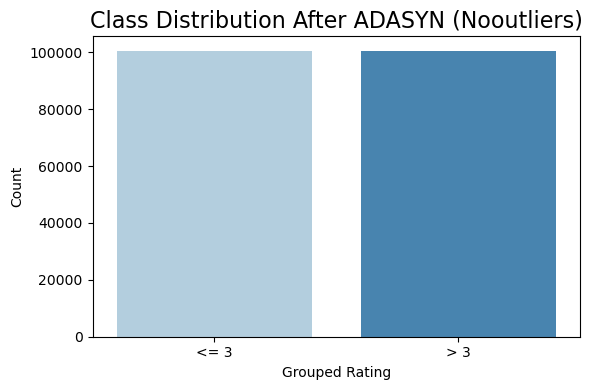

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after ADASYN (Nooutliers): {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score: 0.9524089137274314

Decision Tree Classifier Report (After ADASYN - Nooutliers):
              precision    recall  f1-score   support

        <= 3       0.13      0.19      0.15      1579
         > 3       0.97      0.95      0.96     43084

    accuracy                           0.93     44663
   macro avg       0.55      0.57      0.56     44663
weighted avg       0.94      0.93      0.93     44663



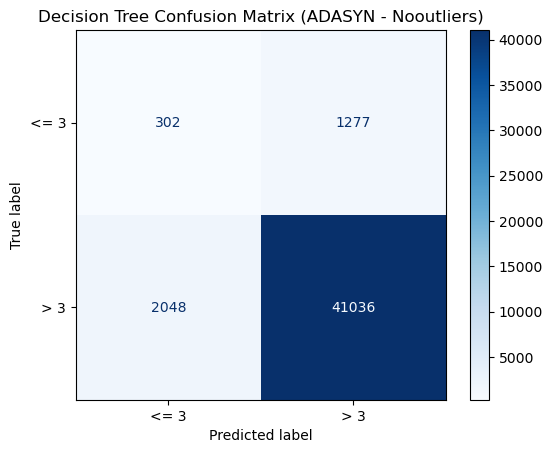

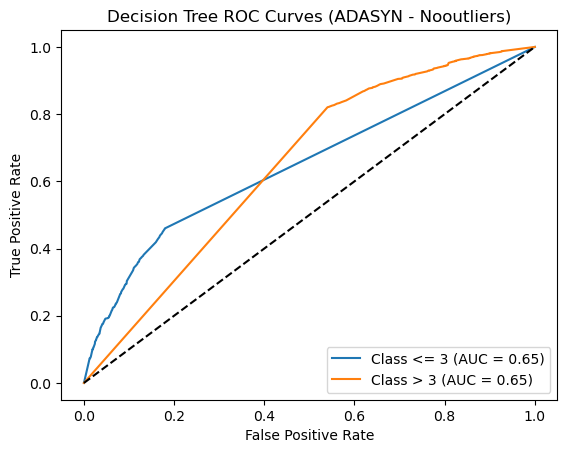

In [30]:
# =============================================================================
# Step 1: Apply ADASYN Oversampling (Nooutliers Dataset)
# =============================================================================
adasyn_nooutliers = ADASYN(sampling_strategy='auto', random_state=42)
try:
    X_res_adasyn_nooutliers, y_res_adasyn_nooutliers = adasyn_nooutliers.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)
except ValueError as e:
    print('ADASYN error:', e)
    X_res_adasyn_nooutliers, y_res_adasyn_nooutliers = X_train_scaled_nooutliers, y_train_nooutliers

# =============================================================================
# Step 2: Plot Class Distribution After ADASYN (Nooutliers)
# =============================================================================
target_counts_adasyn_nooutliers = pd.Series(y_res_adasyn_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_adasyn_nooutliers.index, y=target_counts_adasyn_nooutliers.values, hue=target_counts_adasyn_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After ADASYN (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on ADASYN Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 50],
    'min_samples_leaf': [10, 20, 30],
    'criterion': ['entropy']
}

random_search_adasyn_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_adasyn_nooutliers.fit(X_res_adasyn_nooutliers, y_res_adasyn_nooutliers)
best_params_adasyn_nooutliers = random_search_adasyn_nooutliers.best_params_
print("\nBest hyperparameters for DT after ADASYN (Nooutliers):", best_params_adasyn_nooutliers)
print("Best cross-validated score:", random_search_adasyn_nooutliers.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ADASYN Data (Nooutliers)
# =============================================================================
best_dt_adasyn_nooutliers = DecisionTreeClassifier(**best_params_adasyn_nooutliers, random_state=42)
best_dt_adasyn_nooutliers.fit(X_res_adasyn_nooutliers, y_res_adasyn_nooutliers)

# Predict on the test set
y_pred_adasyn_nooutliers = best_dt_adasyn_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After ADASYN - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_adasyn_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_adasyn_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_adasyn_nooutliers)
disp_adasyn_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_adasyn_nooutliers, display_labels=best_dt_adasyn_nooutliers.classes_)
disp_adasyn_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (ADASYN - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the ADASYN Model (Nooutliers)
# =============================================================================
classes_adasyn_nooutliers = best_dt_adasyn_nooutliers.classes_
y_test_dt_bin_adasyn_nooutliers = label_binarize(y_test_nooutliers, classes=classes_adasyn_nooutliers)
if y_test_dt_bin_adasyn_nooutliers.shape[1] == 1:
    y_test_dt_bin_adasyn_nooutliers = np.hstack([1 - y_test_dt_bin_adasyn_nooutliers, y_test_dt_bin_adasyn_nooutliers])
y_score_adasyn_nooutliers = best_dt_adasyn_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_adasyn_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_adasyn_nooutliers[:, i], y_score_adasyn_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (ADASYN - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.3) Algorithmic-Level Adjustments

### 2.3.1) Adjusting Class Weights

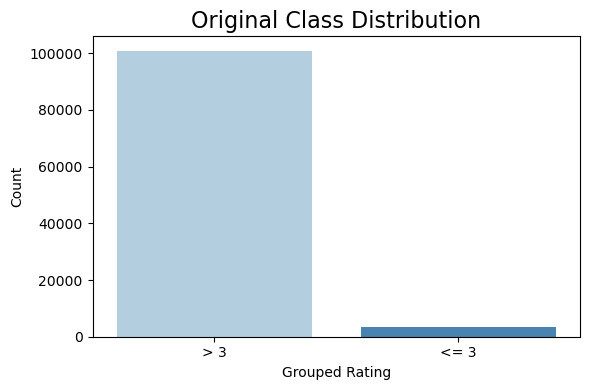

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT with class_weight='balanced': {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score: 0.908891304966116

Decision Tree Classifier Report (Class Weights Balanced):
              precision    recall  f1-score   support

        <= 3       0.13      0.30      0.18      1585
         > 3       0.97      0.93      0.95     43275

    accuracy                           0.90     44860
   macro avg       0.55      0.61      0.56     44860
weighted avg       0.94      0.90      0.92     44860



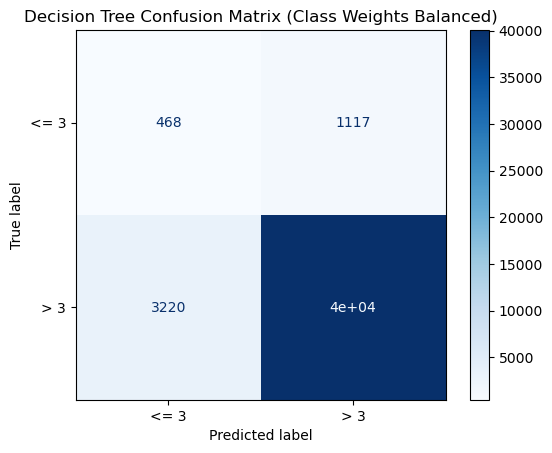

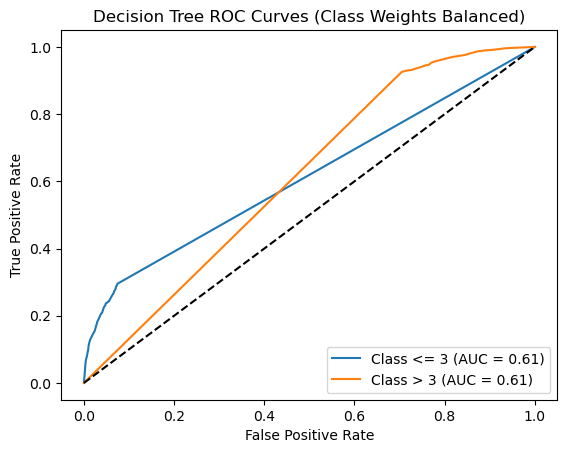

In [31]:
# =============================================================================
# Step 1: Plot Original Class Distribution (No Resampling Applied)
# =============================================================================
target_counts_orig = pd.Series(y_train_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_orig.index, y=target_counts_orig.values, hue=target_counts_orig.index, palette='Blues', legend=False)
plt.title("Original Class Distribution", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 2: Hyperparameter Tuning with RandomizedSearchCV
# =============================================================================
# Define parameter grid
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

# Initialize RandomizedSearchCV with a DT that has balanced class weights
random_search_balanced = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_balanced.fit(X_train_scaled_preprocessed, y_train_preprocessed)
best_params_balanced = random_search_balanced.best_params_
print("\nBest hyperparameters for DT with class_weight='balanced':", best_params_balanced)
print("Best cross-validated score:", random_search_balanced.best_score_)

# =============================================================================
# Step 3: Train & Evaluate Decision Tree Classifier with Adjusted Class Weights
# =============================================================================
best_dt_balanced = DecisionTreeClassifier(**best_params_balanced, random_state=42, class_weight='balanced')
best_dt_balanced.fit(X_train_scaled_preprocessed, y_train_preprocessed)
y_pred_balanced = best_dt_balanced.predict(X_test_scaled_preprocessed)

print("\nDecision Tree Classifier Report (Class Weights Balanced):")
print(classification_report(y_test_preprocessed, y_pred_balanced))

# =============================================================================
# Step 4: Plot Confusion Matrix
# =============================================================================
cm_balanced = confusion_matrix(y_test_preprocessed, y_pred_balanced)
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=best_dt_balanced.classes_)
disp_balanced.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Class Weights Balanced)")
plt.show()

# =============================================================================
# Step 5: Plot ROC Curves for the Balanced Model
# =============================================================================
classes_balanced = best_dt_balanced.classes_
y_test_bin_balanced = label_binarize(y_test_preprocessed, classes=classes_balanced)
if y_test_bin_balanced.shape[1] == 1:
    y_test_bin_balanced = np.hstack([1 - y_test_bin_balanced, y_test_bin_balanced])
y_score_balanced = best_dt_balanced.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_balanced):
    fpr, tpr, _ = roc_curve(y_test_bin_balanced[:, i], y_score_balanced[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Class Weights Balanced)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

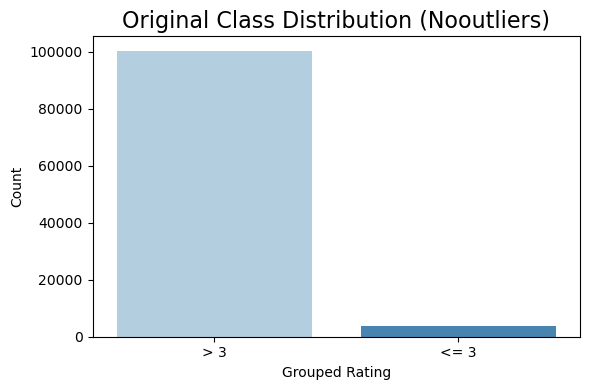

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT with class_weight='balanced' (Nooutliers): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score: 0.9073851233208547

Decision Tree Classifier Report (Class Weights Balanced - Nooutliers):
              precision    recall  f1-score   support

        <= 3       0.12      0.28      0.17      1579
         > 3       0.97      0.92      0.95     43084

    accuracy                           0.90     44663
   macro avg       0.55      0.60      0.56     44663
weighted avg       0.94      0.90      0.92     44663



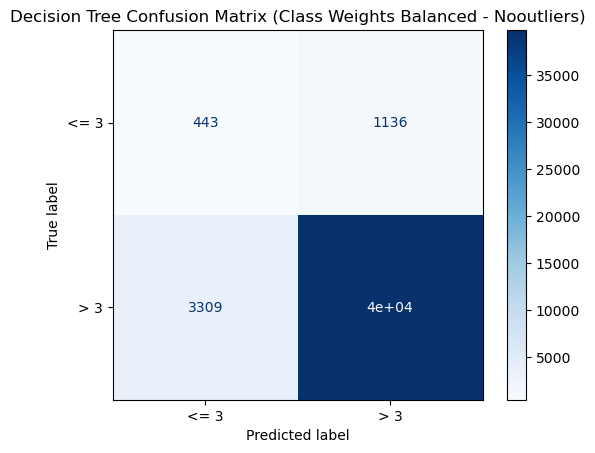

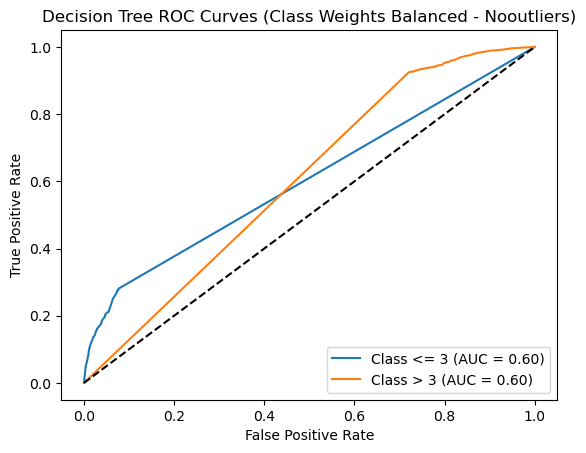

In [32]:
# =============================================================================
# Step 1: Plot Original Class Distribution (No Resampling Applied - Nooutliers)
# =============================================================================
target_counts_orig_nooutliers = pd.Series(y_train_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_orig_nooutliers.index, y=target_counts_orig_nooutliers.values, hue=target_counts_orig_nooutliers.index, palette='Blues', legend=False)
plt.title("Original Class Distribution (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 2: Hyperparameter Tuning with RandomizedSearchCV (with Adjusted Class Weights) on Nooutliers Data
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_balanced_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=10,
    scoring='accuracy'
)
random_search_balanced_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)
best_params_balanced_nooutliers = random_search_balanced_nooutliers.best_params_
print("\nBest hyperparameters for DT with class_weight='balanced' (Nooutliers):", best_params_balanced_nooutliers)
print("Best cross-validated score:", random_search_balanced_nooutliers.best_score_)

# =============================================================================
# Step 3: Train & Evaluate Decision Tree Classifier with Adjusted Class Weights (Nooutliers)
# =============================================================================
best_dt_balanced_nooutliers = DecisionTreeClassifier(**best_params_balanced_nooutliers, random_state=42, class_weight='balanced')
best_dt_balanced_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)
y_pred_balanced_nooutliers = best_dt_balanced_nooutliers.predict(X_test_scaled_nooutliers)

print("\nDecision Tree Classifier Report (Class Weights Balanced - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_balanced_nooutliers))

# =============================================================================
# Step 4: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_balanced_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_balanced_nooutliers)
disp_balanced_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_balanced_nooutliers, display_labels=best_dt_balanced_nooutliers.classes_)
disp_balanced_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Class Weights Balanced - Nooutliers)")
plt.show()

# =============================================================================
# Step 5: Plot ROC Curves for the Balanced Model (Nooutliers)
# =============================================================================
classes_balanced_nooutliers = best_dt_balanced_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_balanced_nooutliers)
if y_test_dt_bin_nooutliers.shape[1] == 1:
    y_test_dt_bin_nooutliers = np.hstack([1 - y_test_dt_bin_nooutliers, y_test_dt_bin_nooutliers])
y_score_balanced_nooutliers = best_dt_balanced_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_balanced_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_balanced_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Class Weights Balanced - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.3.2) Adjusting Class Weights Manually


Best hyperparameters for DT with manual class weights (Preprocessed): {'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy'}

Decision Tree Classifier Report (Manual Class Weights - Preprocessed):
              precision    recall  f1-score   support

        <= 3       0.14      0.34      0.20      1585
         > 3       0.97      0.92      0.95     43275

    accuracy                           0.90     44860
   macro avg       0.56      0.63      0.57     44860
weighted avg       0.95      0.90      0.92     44860



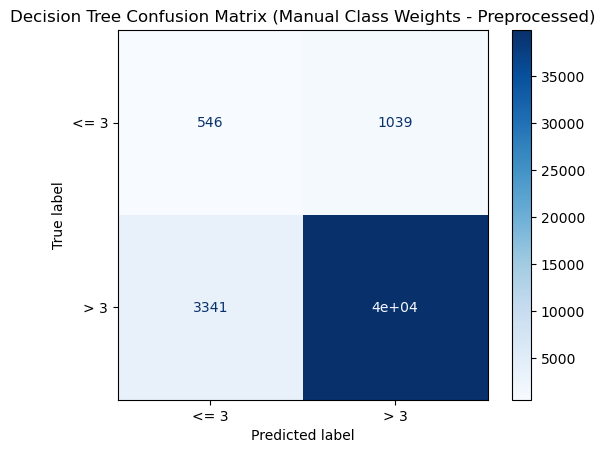

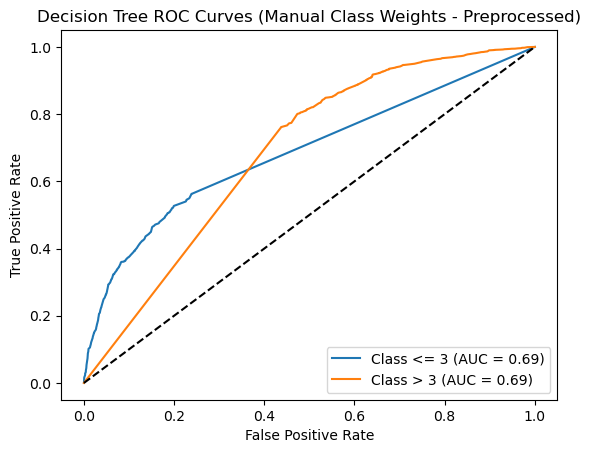

In [33]:
# =============================================================================
# Step 2: Define Manual Class Weights
# =============================================================================
# Assuming the following distribution for groupedRating:
manual_class_weights = {
    "<= 3": 3.0,
    "> 3": 0.5,
}

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV with Manual Class Weights
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [10, 20],
    'criterion': ['entropy']
}

random_search_manual_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight=manual_class_weights),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=3,
    scoring='accuracy'
)
random_search_manual_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)
best_params_manual_preprocessed = random_search_manual_preprocessed.best_params_
print("\nBest hyperparameters for DT with manual class weights (Preprocessed):", best_params_manual_preprocessed)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier with Manual Class Weights (Preprocessed)
# =============================================================================
best_dt_manual_preprocessed = DecisionTreeClassifier(**best_params_manual_preprocessed, random_state=42, class_weight=manual_class_weights)
best_dt_manual_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)
y_pred_manual_preprocessed = best_dt_manual_preprocessed.predict(X_test_scaled_preprocessed)

print("\nDecision Tree Classifier Report (Manual Class Weights - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_manual_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_manual_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_manual_preprocessed)
disp_manual_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_manual_preprocessed, display_labels=best_dt_manual_preprocessed.classes_)
disp_manual_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Manual Class Weights - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves for the Model with Manual Class Weights (Preprocessed)
# =============================================================================
classes_manual = best_dt_manual_preprocessed.classes_
y_test_bin_manual_preprocessed = label_binarize(y_test_preprocessed, classes=classes_manual)
if y_test_bin_manual_preprocessed.shape[1] == 1:
    y_test_bin_manual_preprocessed = np.hstack([1 - y_test_bin_manual_preprocessed, y_test_bin_manual_preprocessed])
y_score_manual_preprocessed = best_dt_manual_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_manual):
    fpr, tpr, _ = roc_curve(y_test_bin_manual_preprocessed[:, i], y_score_manual_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Manual Class Weights - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

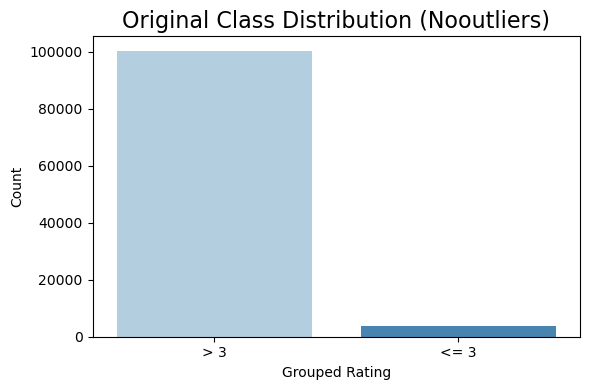


Best hyperparameters for DT with manual class weights (Nooutliers): {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': None, 'criterion': 'entropy'}

Decision Tree Classifier Report (Manual Class Weights - Nooutliers):
              precision    recall  f1-score   support

        <= 3       0.13      0.31      0.18      1579
         > 3       0.97      0.92      0.95     43084

    accuracy                           0.90     44663
   macro avg       0.55      0.62      0.56     44663
weighted avg       0.94      0.90      0.92     44663



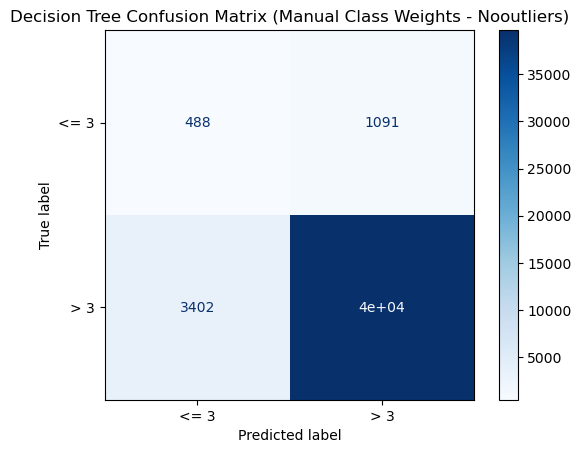

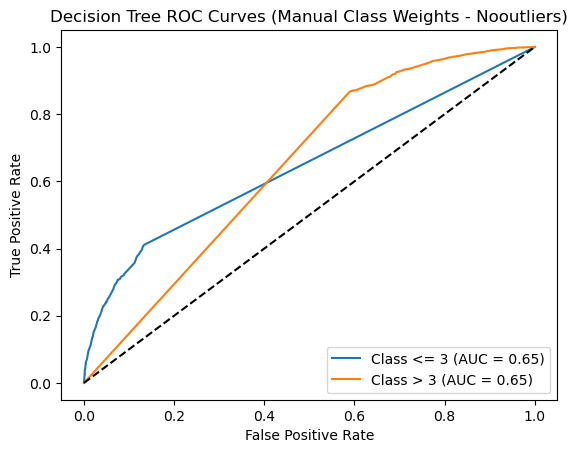

In [34]:
# =============================================================================
# Step 1: (Optional) Plot Original Class Distribution (No Resampling Applied - Nooutliers)
# =============================================================================
target_counts_orig_nooutliers = pd.Series(y_train_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_orig_nooutliers.index, y=target_counts_orig_nooutliers.values, hue=target_counts_orig_nooutliers.index, palette='Blues', legend=False)
plt.title("Original Class Distribution (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 2: Define Manual Class Weights (Nooutliers)
# =============================================================================
manual_class_weights_nooutliers = {
    "<= 3": 3.0,
    "> 3": 0.5,
}

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV with Manual Class Weights (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [10],
    'criterion': ['entropy']
}

random_search_manual_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight=manual_class_weights_nooutliers),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=2,
    scoring='accuracy'
)
random_search_manual_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)
best_params_manual_nooutliers = random_search_manual_nooutliers.best_params_
print("\nBest hyperparameters for DT with manual class weights (Nooutliers):", best_params_manual_nooutliers)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier with Manual Class Weights (Nooutliers)
# =============================================================================
best_dt_manual_nooutliers = DecisionTreeClassifier(**best_params_manual_nooutliers, random_state=42, class_weight=manual_class_weights_nooutliers)
best_dt_manual_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)
y_pred_manual_nooutliers = best_dt_manual_nooutliers.predict(X_test_scaled_nooutliers)

print("\nDecision Tree Classifier Report (Manual Class Weights - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_manual_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_manual_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_manual_nooutliers)
disp_manual_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_manual_nooutliers, display_labels=best_dt_manual_nooutliers.classes_)
disp_manual_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Manual Class Weights - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves for the Model with Manual Class Weights (Nooutliers)
# =============================================================================
classes_manual_nooutliers = best_dt_manual_nooutliers.classes_
y_test_dt_bin_manual_nooutliers = label_binarize(y_test_nooutliers, classes=classes_manual_nooutliers)
if y_test_dt_bin_manual_nooutliers.shape[1] == 1:
    y_test_dt_bin_manual_nooutliers = np.hstack([1 - y_test_dt_bin_manual_nooutliers, y_test_dt_bin_manual_nooutliers])
y_score_manual_nooutliers = best_dt_manual_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_manual_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_manual_nooutliers[:, i], y_score_manual_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Manual Class Weights - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.3.3) Adjusting Decision Thresholds


Best hyperparameters for DT (default threshold, Preprocessed): {'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy'}

Decision Tree Classifier Report (Adjusted Decision Thresholds - Preprocessed):
              precision    recall  f1-score   support

        <= 3       0.16      0.28      0.21      1585
         > 3       0.97      0.95      0.96     43275

    accuracy                           0.92     44860
   macro avg       0.57      0.61      0.58     44860
weighted avg       0.94      0.92      0.93     44860



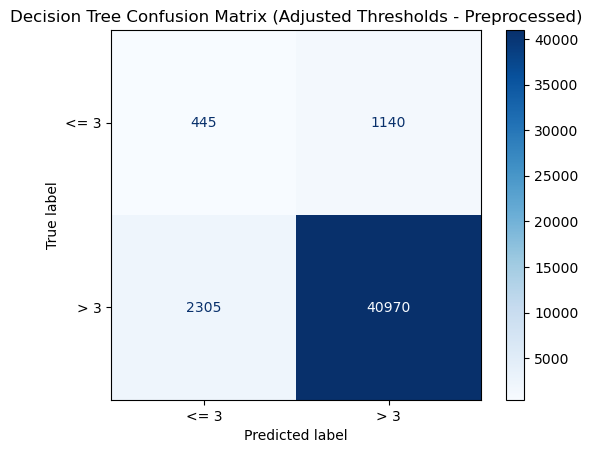

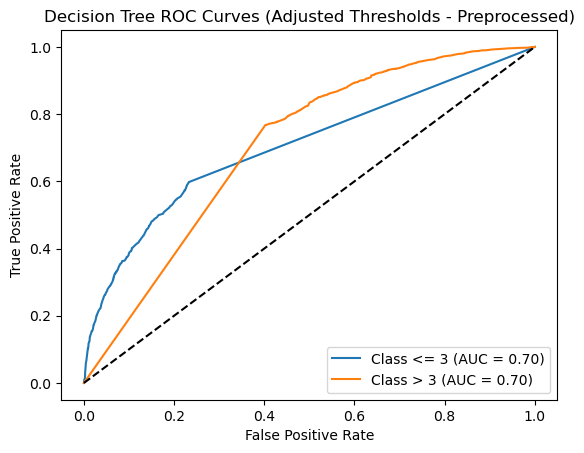

In [35]:
# =============================================================================
# Step 2: Hyperparameter Tuning Using RandomizedSearchCV (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_thresh_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=2,
    scoring='accuracy'
)
random_search_thresh_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)
best_params_thresh_preprocessed = random_search_thresh_preprocessed.best_params_
print("\nBest hyperparameters for DT (default threshold, Preprocessed):", best_params_thresh_preprocessed)

# =============================================================================
# Step 3: Train Decision Tree Classifier with Best Parameters (Preprocessed)
# =============================================================================
best_dt_thresh_preprocessed = DecisionTreeClassifier(**best_params_thresh_preprocessed, random_state=42)
best_dt_thresh_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 4: Adjust Decision Threshold for Each Class (Preprocessed)
# =============================================================================
def adjusted_multiclass_predict(X, clf, thresholds):
    # Get predicted probabilities for each class
    y_probs = clf.predict_proba(X)
    
    # Initialize an array for threshold-adjusted predictions (same shape as y_probs)
    adjusted_preds = np.zeros_like(y_probs)
    
    # Apply per-class threshold adjustments:
    # For each class, mark as 1 if the probability is above the threshold for that class.
    for i, cls in enumerate(clf.classes_):
        adjusted_preds[:, i] = y_probs[:, i] > thresholds[cls]
    
    # For each sample, if no threshold is exceeded, use argmax over y_probs;
    # otherwise, choose the class corresponding to the highest thresholded probability.
    final_preds = []
    for j in range(X.shape[0]):
        if adjusted_preds[j].sum() == 0:
            idx = np.argmax(y_probs[j])
        else:
            idx = np.argmax(adjusted_preds[j])
        # Map the index to the corresponding class label.
        final_preds.append(clf.classes_[idx])
        
    return np.array(final_preds)

# Define class-specific decision thresholds for each new target class (binary scenario)
class_thresholds_preprocessed = {
    "<= 3": 0.2,
    "> 3": 0.8
}

# Use adjusted_multiclass_predict on the test set
y_pred_thresh_preprocessed = adjusted_multiclass_predict(X_test_scaled_preprocessed, best_dt_thresh_preprocessed, class_thresholds_preprocessed)

print("\nDecision Tree Classifier Report (Adjusted Decision Thresholds - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_thresh_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix for Adjusted Predictions (Preprocessed)
# =============================================================================
target_classes_preprocessed = np.array(["<= 3", "> 3"])
cm_thresh_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_thresh_preprocessed, labels=target_classes_preprocessed)
disp_thresh_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_thresh_preprocessed, display_labels=target_classes_preprocessed)
disp_thresh_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Adjusted Thresholds - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves (Preprocessed)
# =============================================================================
# Manually create a full binarized matrix for the expected target classes
y_test_dt_bin_preprocessed = np.column_stack([(y_test_preprocessed == cls).astype(int) for cls in target_classes_preprocessed])
y_score_thresh_preprocessed = best_dt_thresh_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
# Loop over both classes to plot the ROC curves
for i, cls in enumerate(target_classes_preprocessed):
    # Ensure there are two columns in the predicted scores
    if y_score_thresh_preprocessed.shape[1] <= i:
        continue
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_thresh_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Adjusted Thresholds - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()